# Experiments

This notebook has figures for some of the experiments.

In [7]:
pacman::p_load(
  data.table,
  gsheet,
  readxl,
  janitor,
  dplyr,
  ggplot2,
  ggstance,
  fractional,
  RColorBrewer,
  stringr,
  limma,
  tidyr
)

In [8]:
theme_set(theme_classic(base_size = 18) %+replace% theme(
  strip.background = element_blank(),
  # axis.line.y = element_line(colour = "black", size = 0.2),
  # axis.line.x = element_line(colour = "black", size = 0.2),
  axis.ticks   = element_line(colour = "black", size = 0.3),
  panel.border = element_rect(size = 0.3, fill = NA),
  axis.line    = element_blank(),
  plot.title   = element_text(size = 18, vjust = 2, hjust = 0.5),
  panel.grid.major = element_line(size = 0.2)
))

In [9]:
setwd(here::here())
source("R/002_helper_functions.R")

In [10]:
qpcr_colors = list(
  cell_line = c(
    'RA1357'   = '#1B9E77',
    'RA160425' = '#E6AB02',
    'RA355'    = '#7570B3',
    'RA3916'   = '#E7298A'
  ),
  stimulation = c(
    "None" = "grey50",
    "TNF (0.1ng/mL)" = "#FEB24C",
    "TNF (0.1ng/mL)+IL-17 (1ng/mL)" = "#E31A1C"
  ),
  sirna = c(
    "Basal"         = "white",
    "Control siRNA" = "grey30",
    "si-NFKBIZ" = brewer.pal(8, "Set2")[1],
    "si-CUX1"   = brewer.pal(8, "Set2")[2],
    "si-STAT3"  = brewer.pal(8, "Set2")[3],
    "si-STAT4"  = brewer.pal(8, "Set2")[4],
    "si-ELF3"   = brewer.pal(8, "Set2")[5],
    "si-LIFR"   = brewer.pal(8, "Set2")[6]
  )
)

Writing notebooks/figures/9c819.png
Writing notebooks/figures/9c819.pdf


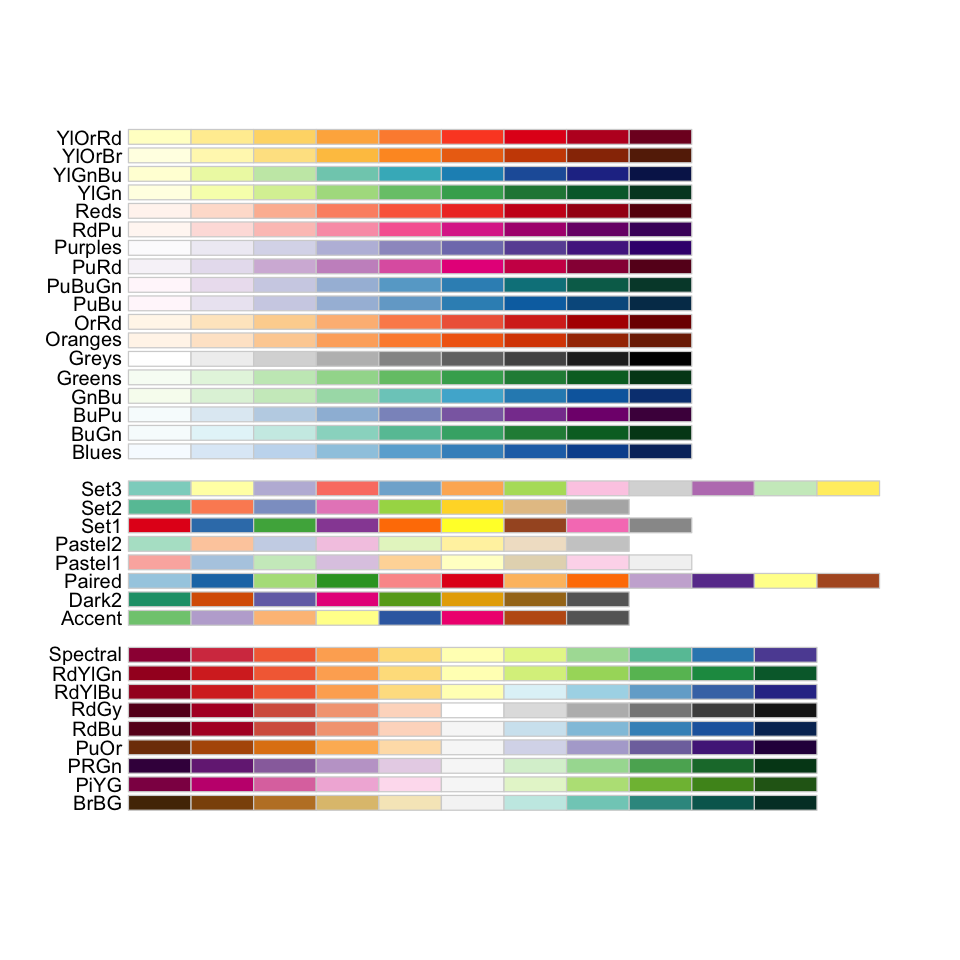

In [11]:
options(repr.plot.width = 8, repr.plot.height = 8)
show_plot(RColorBrewer::display.brewer.all())

# QPCR

In [16]:
d <- read_excel("data/experiments.xlsx", sheet = "QPCR")
d <- clean_names(d)
d$date <- as.character(d$date)
d$sample <- sprintf("S%d", seq(nrow(d)))
d <- d %>% rename(sirna = si_rna, cq_deltarn = cq_delta_rn)

nrow(d)

head(d)

[1] 1561

filename,date,cell_line,time,stimulation,sirna,gene,well,cq_deltarn,passed,sample
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<chr>
HN-qPCR-time-course-STAT3-STAT4-LIFR siRNA - 11-2-15-1.xlsx,2015-11-02,NA,NA,NA,Control,IL6,A1,28.17,TRUE,S1
HN-qPCR-time-course-STAT3-STAT4-LIFR siRNA - 11-2-15-1.xlsx,2015-11-02,NA,NA,NA,Control,IL6,A2,19.08,TRUE,S2
HN-qPCR-time-course-STAT3-STAT4-LIFR siRNA - 11-2-15-1.xlsx,2015-11-02,NA,NA,NA,Control,NA,A3,38.90,TRUE,S3
HN-qPCR-time-course-STAT3-STAT4-LIFR siRNA - 11-2-15-1.xlsx,2015-11-02,NA,NA,NA,Control,NA,A4,23.85,TRUE,S4
HN-qPCR-time-course-STAT3-STAT4-LIFR siRNA - 11-2-15-1.xlsx,2015-11-02,NA,NA,NA,Control,STAT4,A5,30.60,TRUE,S5
HN-qPCR-time-course-STAT3-STAT4-LIFR siRNA - 11-2-15-1.xlsx,2015-11-02,NA,NA,NA,Control,STAT4,A6,27.69,TRUE,S6


In [17]:
ix <- !grepl("Control", d$sirna)

d$sirna[ix] <- sprintf("si-%s", d$sirna[ix])

In [18]:
d$row <- substr(d$well, 1, 1)
d$col <- substr(d$well, 2, 3)

In [19]:
head(d)

filename,date,cell_line,time,stimulation,sirna,gene,well,cq_deltarn,passed,sample,row,col
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<chr>,<chr>,<chr>
HN-qPCR-time-course-STAT3-STAT4-LIFR siRNA - 11-2-15-1.xlsx,2015-11-02,NA,NA,NA,Control,IL6,A1,28.17,TRUE,S1,A,1
HN-qPCR-time-course-STAT3-STAT4-LIFR siRNA - 11-2-15-1.xlsx,2015-11-02,NA,NA,NA,Control,IL6,A2,19.08,TRUE,S2,A,2
HN-qPCR-time-course-STAT3-STAT4-LIFR siRNA - 11-2-15-1.xlsx,2015-11-02,NA,NA,NA,Control,NA,A3,38.90,TRUE,S3,A,3
HN-qPCR-time-course-STAT3-STAT4-LIFR siRNA - 11-2-15-1.xlsx,2015-11-02,NA,NA,NA,Control,NA,A4,23.85,TRUE,S4,A,4
HN-qPCR-time-course-STAT3-STAT4-LIFR siRNA - 11-2-15-1.xlsx,2015-11-02,NA,NA,NA,Control,STAT4,A5,30.60,TRUE,S5,A,5
HN-qPCR-time-course-STAT3-STAT4-LIFR siRNA - 11-2-15-1.xlsx,2015-11-02,NA,NA,NA,Control,STAT4,A6,27.69,TRUE,S6,A,6


In [20]:
with(subset(d, date %in% c("2015-11-02", "2018-07-16")), table(date, gene))

            gene
date         CUX1 GAPDH IL-33 IL6 LIF PRG4 STAT4
  2015-11-02    0    16    16  16  16    0    16
  2018-07-16   15    15     0   0   0   15     0

In [21]:
# We won't use the old data from 2015.
d <- subset(d, date != "2015-11-02")
d <- subset(d, date != "2018-07-16")

In [22]:
d %>% count(date)

date,n
<chr>,<int>
2017-03-13,72
2018-07-10,160
2018-07-11,80
2018-07-20,160
2018-07-22,160
2018-07-23,80
2018-08-02,150
2018-08-03,50
2018-08-06,160


In [23]:
d$dataset <- NA

dates <- c(
  "2018-07-10", "2018-07-11", "2018-07-20", "2018-07-22", "2018-07-23", "2018-08-06"
)
d$dataset[d$date %in% dates] <- 1

dates <- c("2018-08-02", "2018-08-03")
# dates <- c("2018-08-02", "2018-08-03", "2017-03-13")
d$dataset[d$date %in% dates] <- 2

table(d$gene, d$dataset)

       
          1   2
  CCL2    0   0
  CCL20 100   0
  CCL7  100   0
  CCL8  100   0
  CSF3    0   0
  CUX1    0  40
  CXCL1 100   0
  CXCL2 100   0
  CXCL3 100   0
  ELF3    0   0
  GAPDH 100  40
  IL-6    0   0
  IL1A    0   0
  IL33    0   0
  IL6   100   0
  IL8     0   0
  LIF     0   0
  LIFR    0  40
  MMP1    0   0
  MMP3    0   0
  STAT3   0  40
  STAT4   0  40

In [24]:
with(subset(d, dataset == 2), table(gene, sirna))

       sirna
gene    Control si-CUX1 si-LIFR si-STAT3 si-STAT4
  CUX1        8       8       8        8        8
  GAPDH       8       8       8        8        8
  LIFR        8       8       8        8        8
  STAT3       8       8       8        8        8
  STAT4       8       8       8        8        8

## QPCR of *CUX1, LIFR, STAT3, STAT4*

[1] "Control"  "CUX1"     "LIFR"     "STAT3"    "STAT4"    "RA160425" "RA355"   
[8] "RA3916"  


Writing notebooks/figures/qpcr-sirna-efficiency.png
Writing notebooks/figures/qpcr-sirna-efficiency.pdf


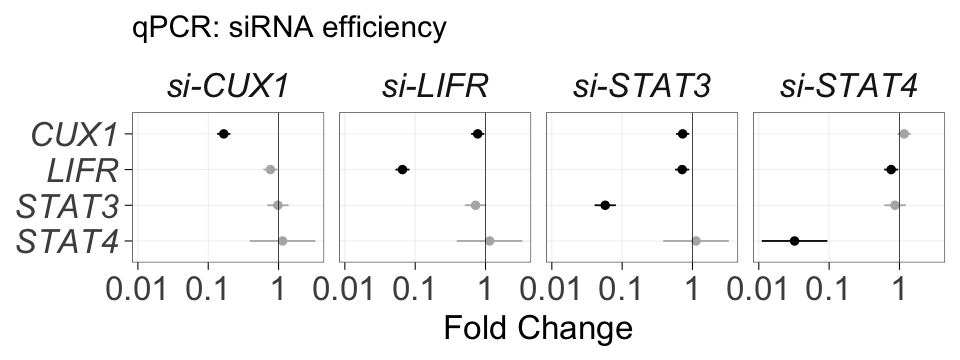

,gene,efficiency,efficiencyL,efficiencyR
,<fct>,<chr>,<chr>,<chr>
CUX1,CUX1,83.4%,79.3%,86.6%
LIFR1,LIFR,93.4%,91.7%,94.8%
STAT32,STAT3,94.3%,91.9%,95.9%
STAT43,STAT4,96.8%,90.6%,98.9%


In [26]:

dat <- subset(d, dataset == 2)

dat <- dat[,lapply(colnames(dat), function(x) length(unique(dat[[x]]))) > 1]

# Average 2 technical replicates.
dat <- dat %>%
group_by(date, cell_line, sirna, gene) %>%
summarise(cq_deltarn = mean(cq_deltarn))

dat$sample <- sprintf("%s_%s", dat$cell_line, dat$sirna)
            
# head(dat)
                   
mat <- as.data.frame(reshape2::dcast(data = dat, formula = gene ~ sample, value.var = "cq_deltarn"))
rownames(mat) <- mat$gene
mat$gene <- NULL
mat <- as.matrix(mat)
mat <- t(apply(mat, 1, function(x) x - mat["GAPDH",]))
mat <- mat[rownames(mat) != "GAPDH",]
# mat
               
meta <- as.data.frame(str_split_fixed(colnames(mat), "_", 2))
colnames(meta) <- c("cell_line", "sirna")
# meta
clean_cols <- function(x) {
  colnames(x) <- str_replace_all(colnames(x), "[()]", "")
  colnames(x) <- str_replace_all(colnames(x), ":", "")
  colnames(x) <- str_replace_all(colnames(x), "sirna", "")
  colnames(x) <- str_replace_all(colnames(x), "si-", "")
  colnames(x) <- str_replace_all(colnames(x), "cell_line", "")
  return(x)
}

des <- clean_cols(with(
  meta,
  model.matrix(~ 0 + sirna + cell_line)
))

print(colnames(des))

fit <- lmFit(object = mat, design = des)
fit <- eBayes(fit)

con <- contrasts.fit(
  fit = fit,
  contrasts = makeContrasts(
    contrasts = c(
      "Control - CUX1",
      "Control - LIFR",
      "Control - STAT3",
      "Control - STAT4"
    ),
    levels = des
  )
)
con <- eBayes(con)

top <- do.call(rbind, lapply(1:4, function(i) {
  retval <- topTable(con, coef = i, confint = TRUE, n = 7)
  retval$gene <- rownames(retval)
  retval$sirna <- c("si-CUX1", "si-LIFR", "si-STAT3", "si-STAT4")[i]
  retval
}))

top$gene <- factor(top$gene, levels = rev(c("CUX1", "LIFR", "STAT3", "STAT4")))

p <- ggplot(top) +
geom_errorbarh(
  mapping = aes(xmin = 2 ^ CI.L, xmax = 2 ^ CI.R, y = gene, color = adj.P.Val < 0.05),
  width = 0, size = 0.5
) +
geom_point(
  mapping = aes(x = 2 ^ logFC, y = gene, color = adj.P.Val < 0.05),
  size = 2
) +
scale_color_manual(values = c("grey70", "black"), guide = FALSE) +
facet_grid(~ sirna) +
geom_vline(xintercept = 1, size = 0.2) +
# scale_x_continuous(breaks = c(0.5, 1, 2), labels = fractional) +
# scale_x_log10(breaks = c(0.25, 0.5, 1, 2), labels = fractional) +
scale_x_log10(labels = function(x) signif(x, 2)) +
theme(
  strip.text = element_text(face = "italic", size = 20),
  axis.text.y = element_text(face = "italic", size = 20),
  axis.text.x = element_text(size = 20),
  axis.title.x = element_text(size = 20),
  plot.title = element_text(size = 20),
  panel.grid.major = element_line(size = 0.2)
) +
labs(
  y = NULL, x = "Fold Change",
  subtitle = "qPCR: siRNA efficiency"
)
              
options(repr.plot.width = 8, repr.plot.height = 3)
              
show_plot(p, "qpcr-sirna-efficiency")
              
top$efficiency <- sprintf("%.1f%%", 100 * (1 - 2^top$logFC))
top$efficiencyR <- sprintf("%.1f%%", 100 * (1 - 2^top$CI.L))
top$efficiencyL <- sprintf("%.1f%%", 100 * (1 - 2^top$CI.R))
top[top$gene == substr(top$sirna, 4, 10), c("gene", "efficiency", "efficiencyL", "efficiencyR")]

Writing notebooks/figures/qpcr-sirna-efficiency.png
Warning message:
“Transformation introduced infinite values in continuous y-axis”Writing notebooks/figures/qpcr-sirna-efficiency.pdf
Warning message:
“Transformation introduced infinite values in continuous y-axis”

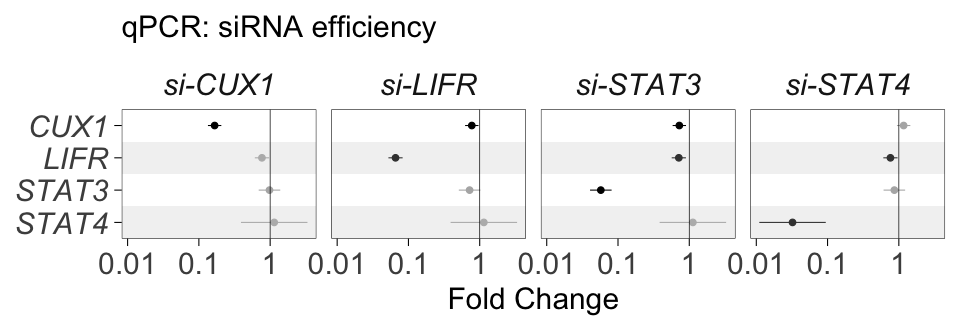

In [27]:
p <- ggplot(top) +
geom_errorbar(
  mapping = aes(ymin = 2 ^ CI.L, ymax = 2 ^ CI.R, x = gene, color = adj.P.Val < 0.05),
  width = 0, size = 0.3
) +
geom_point(
  mapping = aes(y = 2 ^ logFC, x = gene, color = adj.P.Val < 0.05)
) +
annotate(
  geom = "rect",
  ymin = 0, ymax = Inf,
  xmin = seq(0.5, length(unique(top$gene)), by = 2),
  xmax = seq(0.5, length(unique(top$gene)), by = 2) + 1,
  fill = "grey80",
  alpha = 0.25
) +
scale_color_manual(values = c("grey70", "black"), guide = FALSE) +
facet_grid(~ sirna) +
geom_hline(yintercept = 1, size = 0.2) +
coord_flip() +
# scale_x_continuous(breaks = c(0.5, 1, 2), labels = fractional) +
# scale_y_log10(breaks = c(0.25, 0.5, 1, 2), labels = fractional) +
scale_y_log10(breaks = c(0.01, 0.1, 1), labels = signif) +
scale_x_discrete(expand = c(0, 0.5)) +
theme(
  panel.grid.major = element_blank(),
  strip.text = element_text(face = "italic", size = 18),
  axis.text.y = element_text(face = "italic", size = 18),
  axis.text.x = element_text(size = 18),
  axis.title.x = element_text(size = 18),
  plot.title = element_text(size = 18)
) +
labs(
  x = NULL, y = "Fold Change",
  subtitle = "qPCR: siRNA efficiency"
)

options(repr.plot.width = 8, repr.plot.height = 2.75)

show_plot(p, "qpcr-sirna-efficiency")

In [28]:
dat %>% filter(gene == "STAT4") %>% arrange(sirna, cq_deltarn)

date,cell_line,sirna,gene,cq_deltarn,sample
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
2018-08-02,RA3916,Control,STAT4,27.915,RA3916_Control
2018-08-02,RA1357,Control,STAT4,28.090,RA1357_Control
2018-08-02,RA355,Control,STAT4,28.375,RA355_Control
2018-08-03,RA160425,Control,STAT4,29.825,RA160425_Control
2018-08-02,RA3916,si-CUX1,STAT4,26.925,RA3916_si-CUX1
2018-08-02,RA355,si-CUX1,STAT4,28.175,RA355_si-CUX1
2018-08-02,RA1357,si-CUX1,STAT4,28.415,RA1357_si-CUX1
2018-08-03,RA160425,si-CUX1,STAT4,29.985,RA160425_si-CUX1
2018-08-02,RA3916,si-LIFR,STAT4,27.340,RA3916_si-LIFR


date,cell_line,sirna,gene,cq_deltarn,value
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
2018-08-02,RA1357,Control,CUX1,25.785,7.905
2018-08-02,RA1357,Control,LIFR,24.810,6.930
2018-08-02,RA1357,Control,STAT3,21.945,4.065
2018-08-02,RA1357,Control,STAT4,28.090,10.210
2018-08-02,RA1357,si-CUX1,CUX1,28.230,10.490
2018-08-02,RA1357,si-CUX1,LIFR,24.785,7.045


[1] 80

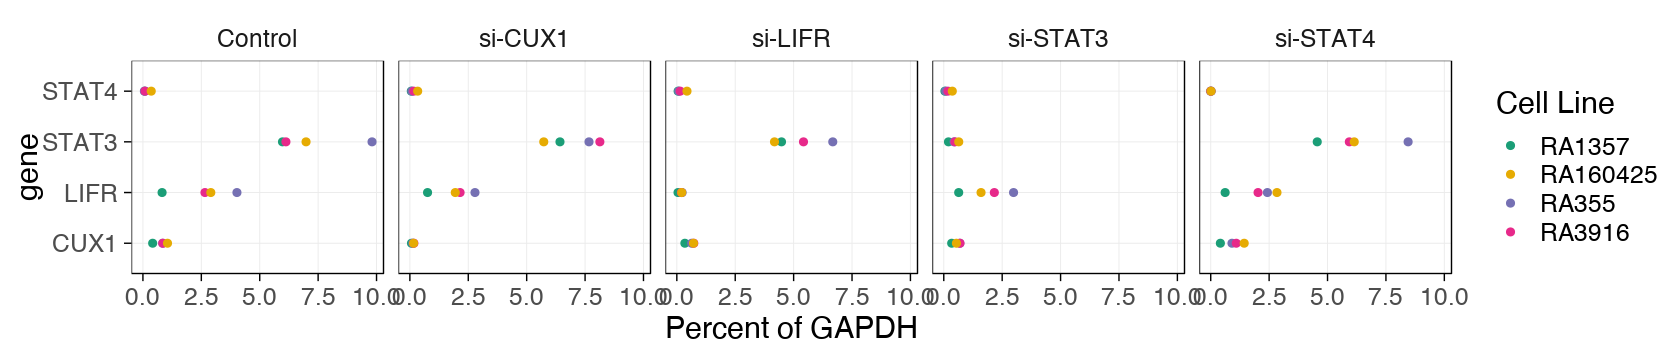

In [29]:
options(repr.plot.width = 14, repr.plot.height = 3)

dat <- subset(d, dataset == 2)

dat <- dat[,lapply(colnames(dat), function(x) length(unique(dat[[x]]))) > 1]

# Average 2 technical replicates.
dat <- dat %>%
group_by(date, cell_line, sirna, gene) %>%
summarise(cq_deltarn = mean(cq_deltarn))
                   
dat <- dat %>%
group_by(date, cell_line, sirna) %>%
mutate(value = cq_deltarn - cq_deltarn[gene == "GAPDH"]) %>%
filter(gene != "GAPDH")

head(dat)
nrow(dat)

dat$value <- 100 * 2 ^ -dat$value

ggplot(dat) +
aes(x = value, y = gene, color = cell_line) +
geom_point() +
# scale_y_continuous(breaks = scales::pretty_breaks(3)) +
scale_color_manual(values = qpcr_colors$cell_line, name = "Cell Line") +
facet_grid( ~ sirna) +
labs(x = "Percent of GAPDH")

In [30]:
table(d$date, d$gene)

            
             CCL2 CCL20 CCL7 CCL8 CSF3 CUX1 CXCL1 CXCL2 CXCL3 ELF3 GAPDH IL-6
  2017-03-13    0     0    0    0    0    0    18     0     0   18    18   18
  2018-07-10    0    20   20   20    0    0    20    20    20    0    20    0
  2018-07-11    0    10   10   10    0    0    10    10    10    0    10    0
  2018-07-20    0    20   20   20    0    0    20    20    20    0    20    0
  2018-07-22    0    20   20   20    0    0    20    20    20    0    20    0
  2018-07-23    0    10   10   10    0    0    10    10    10    0    10    0
  2018-08-02    0     0    0    0    0   30     0     0     0    0    30    0
  2018-08-03    0     0    0    0    0   10     0     0     0    0    10    0
  2018-08-06    0    20   20   20    0    0    20    20    20    0    20    0
  2018-09-11    0    14    0    0    0    0    14    14    14    0    14    0
  2018-09-13   14     0   14    0    0    0     0     0     0    0    14    0
  2018-11-01    0     0    0    0   14    0     0  

## QPCR of *CCL20, CCL7, CCL8, IL6, CXCL1, CXCL2, CXCL3*

date,cell_line,time,stimulation,sirna,gene,cq_deltarn,sample
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
2018-07-11,RA1357,16,TNF+IL17,Control,CCL20,25.195,RA1357_Control
2018-07-11,RA1357,16,TNF+IL17,Control,CCL7,20.900,RA1357_Control
2018-07-11,RA1357,16,TNF+IL17,Control,CCL8,21.565,RA1357_Control
2018-07-11,RA1357,16,TNF+IL17,Control,CXCL1,18.055,RA1357_Control
2018-07-11,RA1357,16,TNF+IL17,Control,CXCL2,19.010,RA1357_Control
2018-07-11,RA1357,16,TNF+IL17,Control,CXCL3,21.850,RA1357_Control


[1] "Control"  "CUX1"     "LIFR"     "STAT3"    "STAT4"    "RA160425" "RA355"   
[8] "RA3916"  


Writing notebooks/figures/qpcr-chemokines.png
Warning message:
“Transformation introduced infinite values in continuous y-axis”Writing notebooks/figures/qpcr-chemokines.pdf
Warning message:
“Transformation introduced infinite values in continuous y-axis”

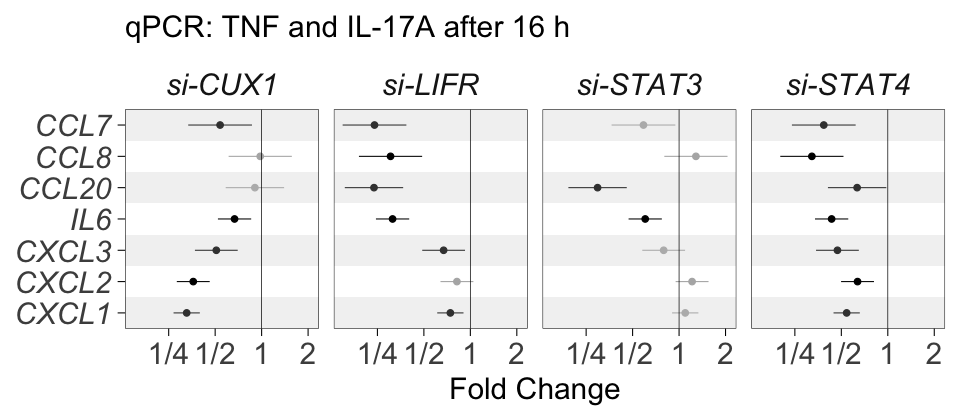

In [32]:
# these_dates <- names(which(table(d$date, d$gene)[,1] > 1))
# these_dates

dat <- subset(d, gene %in% c("GAPDH", "CCL20", "CCL7" ,"CCL8", "IL6", "CXCL1", "CXCL2", "CXCL3") & time == "16")

# Average the 2 technical replicates.
dat %<>%
group_by(date, cell_line, time, stimulation, sirna, gene) %>%
summarise(cq_deltarn = mean(cq_deltarn))

dat$sample <- sprintf("%s_%s", dat$cell_line, dat$sirna)

head(dat)

mat <- as.data.frame(reshape2::dcast(data = dat, formula = gene ~ sample, value.var = "cq_deltarn"))
rownames(mat) <- mat$gene
mat$gene <- NULL
mat <- as.matrix(mat)
mat <- t(apply(mat, 1, function(x) x - mat["GAPDH",]))
mat <- mat[rownames(mat) != "GAPDH",]
#mat

meta <- as.data.frame(str_split_fixed(colnames(mat), "_", 2))
colnames(meta) <- c("cell_line", "sirna")
#meta
               
clean_cols <- function(x) {
  colnames(x) <- str_replace_all(colnames(x), "[()]", "")
  colnames(x) <- str_replace_all(colnames(x), ":", "")
  colnames(x) <- str_replace_all(colnames(x), "sirna", "")
  colnames(x) <- str_replace_all(colnames(x), "si-", "")
  colnames(x) <- str_replace_all(colnames(x), "cell_line", "")
  return(x)
}

des <- clean_cols(with(
  meta,
  model.matrix(~ 0 + sirna + cell_line)
))

print(colnames(des))

fit <- lmFit(object = mat, design = des)
fit <- eBayes(fit)

con <- contrasts.fit(
  fit = fit,
  contrasts = makeContrasts(
    contrasts = c(
      "Control - CUX1",
      "Control - LIFR",
      "Control - STAT3",
      "Control - STAT4"
    ),
    levels = des
  )
)
con <- eBayes(con)

top <- do.call(rbind, lapply(1:4, function(i) {
  retval <- topTable(con, coef = i, confint = TRUE, n = 7)
  retval$gene <- rownames(retval)
  retval$sirna <- c("si-CUX1", "si-LIFR", "si-STAT3", "si-STAT4")[i]
  retval
}))

top$gene <- factor(top$gene, levels = rev(c("CCL7", "CCL8", "CCL20", "IL6", "CXCL3", "CXCL2", "CXCL1")))

p <- ggplot(top) +
geom_errorbar(
  mapping = aes(ymin = 2 ^ CI.L, ymax = 2 ^ CI.R, x = gene, color = adj.P.Val < 0.05),
  width = 0, size = 0.3
) +
geom_point(
  mapping = aes(y = 2 ^ logFC, x = gene, color = adj.P.Val < 0.05)
) +
annotate(
  geom = "rect",
  ymin = 0, ymax = Inf,
  xmin = seq(0.5, length(unique(top$gene)), by = 2),
  xmax = seq(0.5, length(unique(top$gene)), by = 2) + 1,
  fill = "grey80",
  alpha = 0.25
) +
scale_color_manual(values = c("grey70", "black"), guide = FALSE) +
facet_grid(~ sirna) +
geom_hline(yintercept = 1, size = 0.2) +
coord_flip() +
# scale_x_continuous(breaks = c(0.5, 1, 2), labels = fractional) +
scale_y_log10(breaks = c(1/4, 0.5, 1, 2), labels = fractional) +
scale_x_discrete(expand = c(0, 0)) +
theme(
  panel.grid.major = element_blank(),
  strip.text = element_text(face = "italic", size = 18),
  axis.text.y = element_text(face = "italic", size = 18),
  axis.text.x = element_text(size = 18),
  axis.title.x = element_text(size = 18),
  plot.title = element_text(size = 18)
) +
labs(
  x = NULL, y = "Fold Change",
  subtitle = "qPCR: TNF and IL-17A after 16 h"
)

#options(repr.plot.width = 9, repr.plot.height = 3.5)
               
options(repr.plot.width = 8, repr.plot.height = 3.5)

show_plot(p, name = "qpcr-chemokines")

In [33]:
mat

,RA1357_Control,RA1357_si-CUX1,RA1357_si-LIFR,RA1357_si-STAT3,RA1357_si-STAT4,RA160425_Control,RA160425_si-CUX1,RA160425_si-LIFR,RA160425_si-STAT3,RA160425_si-STAT4,RA355_Control,RA355_si-CUX1,RA355_si-LIFR,RA355_si-STAT3,RA355_si-STAT4,RA3916_Control,RA3916_si-CUX1,RA3916_si-LIFR,RA3916_si-STAT3,RA3916_si-STAT4
CCL20,7.210,8.295,9.235,8.725,7.275,3.470,2.945,4.950,4.705,4.175,5.615,5.805,8.180,8.175,6.475,4.065,3.895,6.290,5.770,5.075
CCL7,2.915,4.890,5.730,4.650,5.685,1.255,1.865,2.795,1.210,1.980,3.910,4.880,5.275,4.470,4.610,3.060,3.080,5.590,3.875,4.375
CCL8,3.580,4.210,6.045,4.940,6.085,2.625,2.465,3.335,1.280,3.865,5.300,5.155,7.525,4.695,6.635,3.255,3.050,4.725,2.395,4.710
CXCL1,0.070,1.590,0.605,0.070,1.090,-0.315,1.040,-0.230,-0.710,0.380,1.400,3.290,1.775,1.165,2.160,-0.045,1.640,0.680,0.055,1.020
CXCL2,1.025,2.540,1.605,0.975,2.055,1.255,2.210,1.060,0.570,1.730,2.980,4.460,3.090,2.540,3.140,1.120,3.055,1.780,1.175,2.060
CXCL3,3.865,5.305,4.520,4.450,5.070,3.200,3.325,3.060,2.895,3.815,5.075,6.155,5.415,5.115,5.855,3.190,4.445,4.635,4.195,4.925
IL6,1.535,2.265,2.890,1.955,2.685,-0.480,0.030,1.340,0.225,1.020,-0.250,0.630,1.965,0.900,0.955,-1.015,-0.805,0.290,-0.375,-0.035



  2 
500 

date,cell_line,time,stimulation,sirna,gene,cq_deltarn
2018-07-10,RA1357,0,TNF+IL17,Control,CCL20,39.55
2018-07-10,RA1357,0,TNF+IL17,Control,CCL7,26.41
2018-07-10,RA1357,0,TNF+IL17,Control,CCL8,27.89
2018-07-10,RA1357,0,TNF+IL17,Control,CXCL1,28.70
2018-07-10,RA1357,0,TNF+IL17,Control,CXCL2,28.80
2018-07-10,RA1357,0,TNF+IL17,Control,CXCL3,30.43


date,cell_line,time,stimulation,sirna,gene,cq_deltarn,value
2018-07-10,RA1357,0,TNF+IL17,Control,CCL20,39.55,21.255
2018-07-10,RA1357,0,TNF+IL17,Control,CCL7,26.41,8.115
2018-07-10,RA1357,0,TNF+IL17,Control,CCL8,27.89,9.595
2018-07-10,RA1357,0,TNF+IL17,Control,CXCL1,28.70,10.405
2018-07-10,RA1357,0,TNF+IL17,Control,CXCL2,28.80,10.505
2018-07-10,RA1357,0,TNF+IL17,Control,CXCL3,30.43,12.135


[1] 350

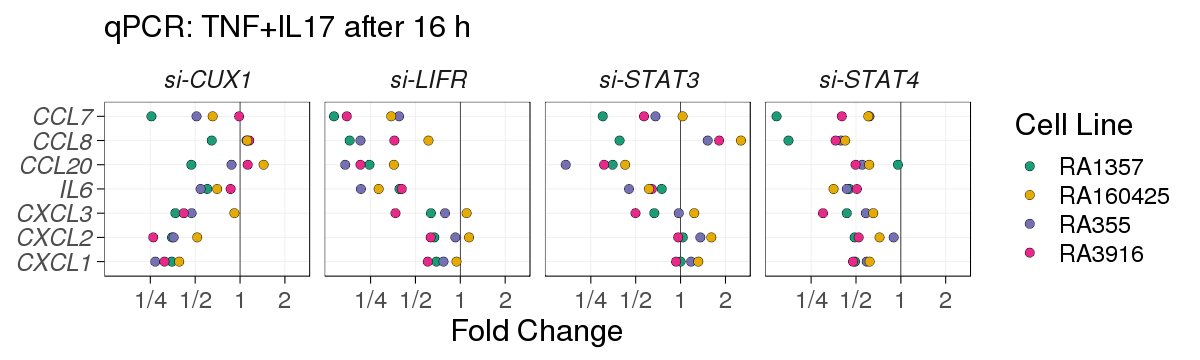

In [34]:
options(repr.plot.width = 10, repr.plot.height = 3)

these_dates <- names(which(table(d$date, d$gene)[,1] > 1))

dat <- subset(d, date %in% these_dates)

table(table(paste(d$date, d$cell_line, d$time, d$stimulation, d$sirna, d$gene)))

dat <- dat %>%
group_by(date, cell_line, time, stimulation, sirna, gene) %>%
summarise(cq_deltarn = mean(cq_deltarn))

head(dat)

dat <- dat %>%
group_by(date, cell_line, time, stimulation, sirna) %>%
mutate(value = cq_deltarn - cq_deltarn[gene == "GAPDH"]) %>%
filter(gene != "GAPDH")

head(dat)
nrow(dat)

dat$value <- 100 * 2 ^ -dat$value

dat2 <- dat %>%
group_by(date, cell_line, time, stimulation) %>%
mutate(relative = value / value[sirna == "Control"]) %>%
filter(sirna != "Control")

dat2 <- dat2 %>% filter(time == "16")

dat2$gene <- factor(dat2$gene, levels = rev(c("CCL7", "CCL8", "CCL20", "IL6", "CXCL3", "CXCL2", "CXCL1")))

p <- ggplot(dat2, aes(y = gene, x = relative, fill = cell_line)) +
geom_vline(xintercept = 1, size = 0.2) +
geom_point(size = 2.5, shape = 21, stroke = 0.2) +
facet_grid(~ sirna) + #, scales = "free_x") +
# scale_x_continuous(breaks = c(0.5, 1, 2), labels = fractional) +
scale_x_log10(breaks = c(0.25, 0.5, 1, 2), labels = fractional) +
scale_fill_manual(values = qpcr_colors$cell_line, name = "Cell Line") +
theme(
  strip.text = element_text(face = "italic"),
  axis.text.y = element_text(face = "italic"),
  panel.grid.major = element_line(size = 0.2)
) +
labs(
  y = NULL, x = "Fold Change",
  subtitle = "qPCR: TNF+IL17 after 16 h"
)

show_plot(p)

## 2018-07-10


CCL20  CCL7  CCL8 CXCL1 CXCL2 CXCL3 GAPDH   IL6 
   20    20    20    20    20    20    20    20 

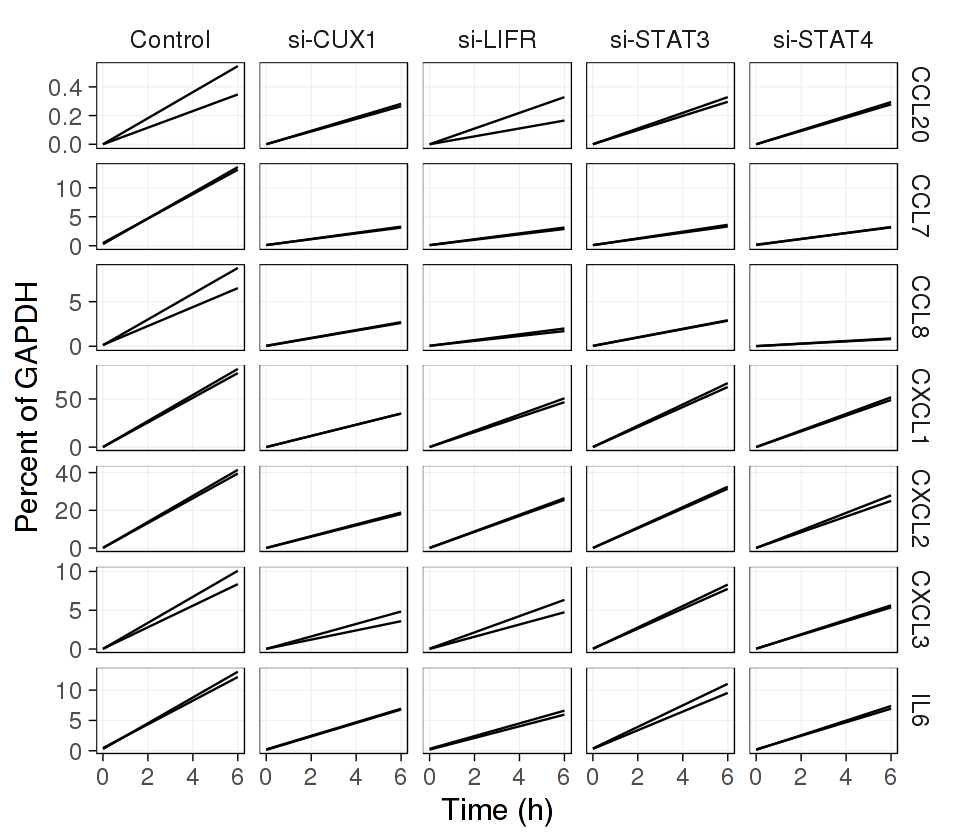

In [35]:
options(repr.plot.width = 8, repr.plot.height = 7)

this_date <- "2018-07-10"

dat <- subset(d, date == this_date)
table(dat$gene)

dat <- dat %>%
group_by(filename, col) %>%
mutate(value = cq_deltarn - cq_deltarn[gene == "GAPDH"]) %>%
filter(gene != "GAPDH")

dat$value <- 100 * 2 ^ -dat$value

ggplot(dat) +
aes(x = time, y = value, group = paste(filename, gene)) +
# geom_point() +
geom_line() +
scale_y_continuous(breaks = scales::pretty_breaks(3)) +
facet_grid(gene ~ sirna, scales = "free_y") +
labs(y = "Percent of GAPDH", x = "Time (h)")

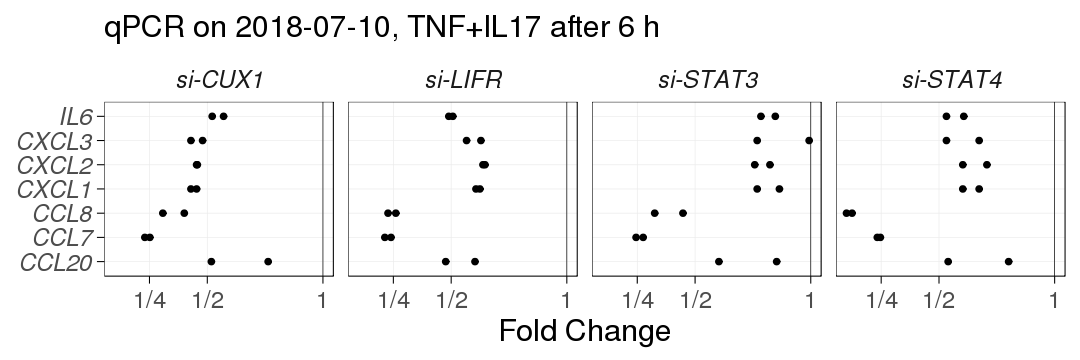

In [36]:
options(repr.plot.width = 9, repr.plot.height = 3)

dat2 <- subset(dat, time > 0)
dat2 <- dat2 %>%
group_by(filename, row) %>%
mutate(relative = value / value[sirna == "Control"]) %>%
filter(sirna != "Control")

p <- ggplot(dat2, aes(y = gene, x = relative)) +
geom_vline(xintercept = 1, size = 0.2) +
geom_point(size = 1.5) +
facet_grid(~ sirna) + #, scales = "free_x") +
scale_x_continuous(breaks = c(0.25, 0.5, 1, 2), labels = fractional) +
theme(
  strip.text = element_text(face = "italic"),
  axis.text.y = element_text(face = "italic"),
  panel.grid.major = element_line(size = 0.2)
) +
labs(y = NULL, x = "Fold Change",
    subtitle = sprintf("qPCR on %s, TNF+IL17 after 6 h", this_date))

show_plot(p)

## 2018-08-06


CCL20  CCL7  CCL8 CXCL1 CXCL2 CXCL3 GAPDH   IL6 
   20    20    20    20    20    20    20    20 

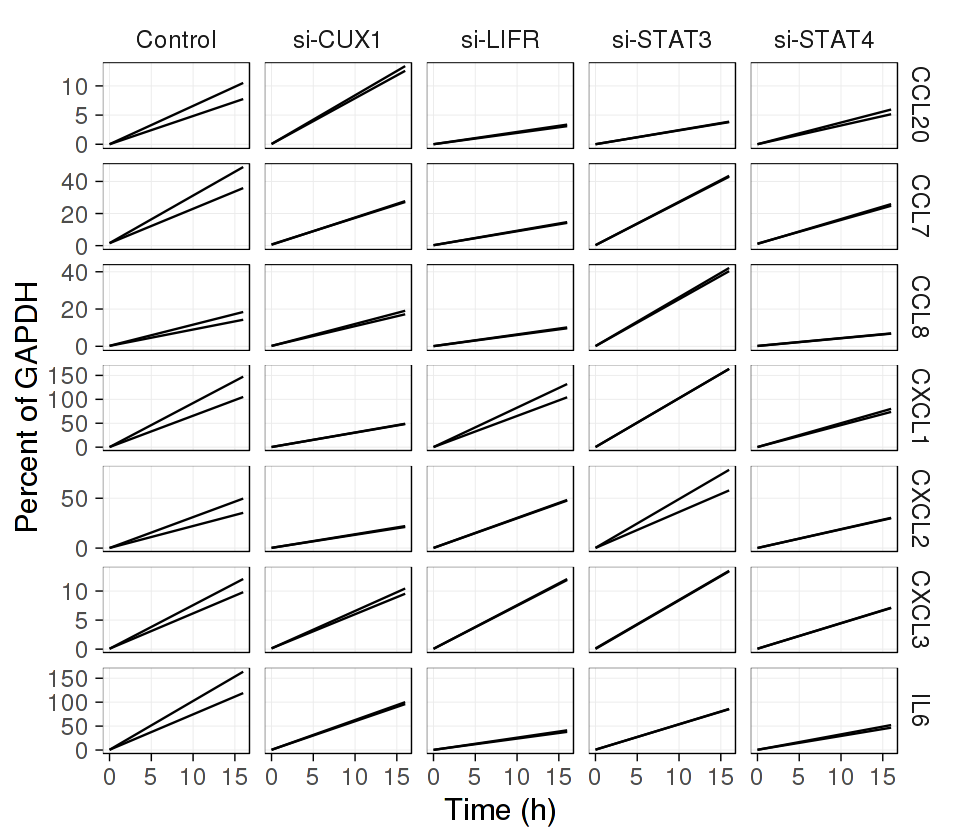

In [37]:
options(repr.plot.width = 8, repr.plot.height = 7)

this_date <- "2018-08-06"

dat <- subset(d, date == this_date)
table(dat$gene)

dat <- dat %>%
group_by(filename, col) %>%
mutate(value = cq_deltarn - cq_deltarn[gene == "GAPDH"]) %>%
filter(gene != "GAPDH")

dat$value <- 100 * 2 ^ -dat$value

ggplot(dat) +
aes(x = time, y = value, group = paste(filename, gene)) +
# geom_point() +
geom_line() +
scale_y_continuous(breaks = scales::pretty_breaks(3)) +
facet_grid(gene ~ sirna, scales = "free_y") +
labs(y = "Percent of GAPDH", x = "Time (h)")

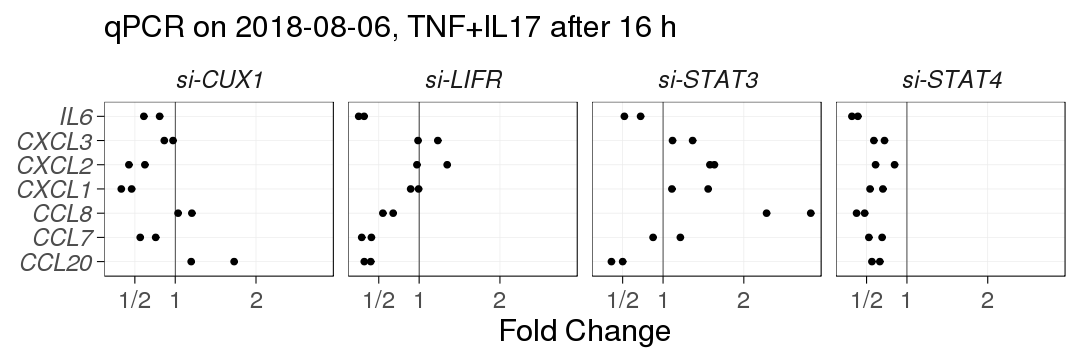

In [38]:
options(repr.plot.width = 9, repr.plot.height = 3)

dat2 <- subset(dat, time > 0)
dat2 <- dat2 %>%
group_by(filename, row) %>%
mutate(relative = value / value[sirna == "Control"]) %>%
filter(sirna != "Control")

p <- ggplot(dat2, aes(y = gene, x = relative)) +
geom_vline(xintercept = 1, size = 0.2) +
geom_point(size = 1.5) +
facet_grid(~ sirna) + #, scales = "free_x") +
scale_x_continuous(breaks = c(0.5, 1, 2), labels = fractional) +
theme(
  strip.text = element_text(face = "italic"),
  axis.text.y = element_text(face = "italic"),
  panel.grid.major = element_line(size = 0.2)
) +
labs(
  y = NULL, x = "Fold Change",
  subtitle = sprintf("qPCR on %s, TNF+IL17 after 16 h", this_date)
)

show_plot(p)

---

# ChIP QPCR

In [44]:
chip <- read_excel("data/experiments.xlsx", sheet = "ChIP-QPCR")
chip <- clean_names(chip)
chip$date <- as.character(chip$date)
chip$sample <- sprintf("S%d", seq(nrow(chip)))
chip$time <- as.character(chip$time)
chip$row <- substr(chip$well, 1, 1)
chip$replicate <- rep(c(1, 2), each = 6)
head(chip, 6)

filename,date,cell_line,stimulation,antibody,promoter,time,well,ct_delta_rn,replicate,passed,sample,row
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<chr>
HN-CUX1-ChIP-RA3916-1-3-17.xlsx,2017-01-03,RA3916,TNF(1ng/mL)+IL-17(1ng/mL),CUX1,"LIF,1",0,A4,29.25,1,TRUE,S1,A
HN-CUX1-ChIP-RA3916-1-3-17.xlsx,2017-01-03,RA3916,TNF(1ng/mL)+IL-17(1ng/mL),CUX1,"LIF,1",1,A5,26.64,1,TRUE,S2,A
HN-CUX1-ChIP-RA3916-1-3-17.xlsx,2017-01-03,RA3916,TNF(1ng/mL)+IL-17(1ng/mL),CUX1,"LIF,1",3,A6,27.29,1,TRUE,S3,A
HN-CUX1-ChIP-RA3916-1-3-17.xlsx,2017-01-03,RA3916,TNF(1ng/mL)+IL-17(1ng/mL),Control,"LIF,1",0,A7,24.50,1,TRUE,S4,A
HN-CUX1-ChIP-RA3916-1-3-17.xlsx,2017-01-03,RA3916,TNF(1ng/mL)+IL-17(1ng/mL),Control,"LIF,1",1,A8,24.49,1,TRUE,S5,A
HN-CUX1-ChIP-RA3916-1-3-17.xlsx,2017-01-03,RA3916,TNF(1ng/mL)+IL-17(1ng/mL),Control,"LIF,1",3,A9,24.56,1,TRUE,S6,A


In [38]:
chip <- chip[,apply(chip, 2, function(x) length(unique(x))) > 1]

In [39]:
table(chip$promoter, chip$date)

         
          2017-01-03 2018-08-22 2019-10-11 2019-10-12
  CCL20,3         12          0          0          0
  CXCL1            0          0          8         16
  CXCL1,1          0         12          0          0
  CXCL2            0          0          8         16
  CXCL2,1          0         12          0          0
  CXCL3            0          0          8         16
  CXCL3,1          0         12          0          0
  IL6,2           12          0          0          0
  IL8,1b          12          0          0          0
  LIF,1           12          0          0          0

In [49]:
table(chip$antibody, chip$date)

             
              2017-01-03 2018-08-22 2019-10-11 2019-10-12
  Control             24         18          0          0
  Control IgG          0          0         12          0
  CUX1                24         18          0         24
  Input                0          0         12         24

[1] TRUE

[1] TRUE

filename,date,cell_line,stimulation,antibody,promoter,time,well,ct_delta_rn,replicate,passed,sample,row,ddct
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<dbl>
HN-CUX1-ChIP-RA3916-1-3-17.xlsx,2017-01-03,RA3916,TNF(1ng/mL)+IL-17(1ng/mL),CUX1,LIF,0,A4,4.75,1,TRUE,S1,A,0.03716272
HN-CUX1-ChIP-RA3916-1-3-17.xlsx,2017-01-03,RA3916,TNF(1ng/mL)+IL-17(1ng/mL),CUX1,LIF,1,A5,2.15,1,TRUE,S2,A,0.22531262
HN-CUX1-ChIP-RA3916-1-3-17.xlsx,2017-01-03,RA3916,TNF(1ng/mL)+IL-17(1ng/mL),CUX1,LIF,3,A6,2.73,1,TRUE,S3,A,0.15072598
HN-CUX1-ChIP-RA3916-1-3-17.xlsx,2017-01-03,RA3916,TNF(1ng/mL)+IL-17(1ng/mL),CUX1,LIF,0,B4,4.85,2,TRUE,S7,B,0.03467405
HN-CUX1-ChIP-RA3916-1-3-17.xlsx,2017-01-03,RA3916,TNF(1ng/mL)+IL-17(1ng/mL),CUX1,LIF,1,B5,2.19,2,TRUE,S8,B,0.21915143
HN-CUX1-ChIP-RA3916-1-3-17.xlsx,2017-01-03,RA3916,TNF(1ng/mL)+IL-17(1ng/mL),CUX1,LIF,3,B6,2.37,2,TRUE,S9,B,0.19344562


Writing notebooks/figures/chip-qpcr.png
Writing notebooks/figures/chip-qpcr.pdf


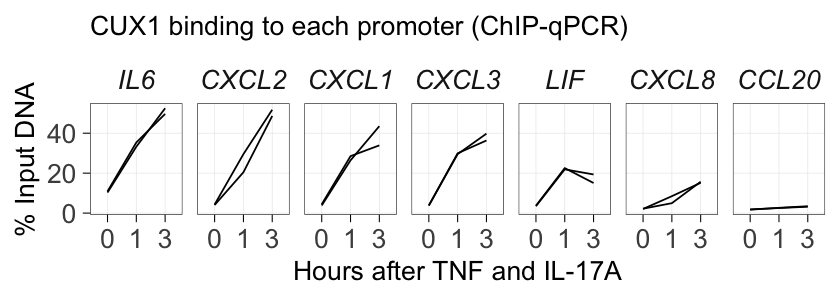

In [51]:
chip_cux1 <- subset(chip, antibody == "CUX1" & date != "2019-10-12")
chip_control <- subset(chip, antibody == "Control" & date != "2019-10-12")

all(chip_cux1$promoter == chip_control$promoter)
all(chip_cux1$time == chip_control$time)

chip_cux1$ct_delta_rn <- chip_cux1$ct_delta_rn - chip_control$ct_delta_rn

chip_cux1$ddct <- 2 ^ - chip_cux1$ct_delta_rn

chip_cux1$promoter <- str_split_fixed(chip_cux1$promoter, ",", 2)[,1]

head(chip_cux1)

chip_cux1$promoter[chip_cux1$promoter == "IL8"] <- "CXCL8"

chip_cux1$promoter <- factor(chip_cux1$promoter, levels = c("IL6", "CXCL2", "CXCL1", "CXCL3", "LIF", "CXCL8", "CCL20"))


p <- ggplot(chip_cux1) +
aes(x = time, y = 100 * ddct, group = paste(promoter, replicate)) +
geom_line() +
facet_grid(~ promoter) +
scale_y_continuous(breaks = scales::pretty_breaks(3)) +
# scale_color_discrete(guide = FALSE) +
theme(
  strip.text = element_text(face = "italic", size = 16),
  plot.title = element_text(size = 16),
  plot.subtitle = element_text(size = 16),
  axis.title = element_text(size = 16),
  axis.text = element_text(size = 16)
) +
labs(
  x = "Hours after TNF and IL-17A",
  y = "% Input DNA",
  subtitle = "CUX1 binding to each promoter (ChIP-qPCR)"
)

options(repr.plot.width = 7, repr.plot.height = 2.5)

show_plot(p, name = "chip-qpcr")
# show_plot(p, res = 300)

promoter,replicate,time,fold
<fct>,<dbl>,<chr>,<dbl>
IL6,1,t1,3.226567
IL6,2,t1,3.249010
CXCL2,1,t1,5.063026
CXCL2,2,t1,6.868523
CXCL1,1,t1,6.453134
CXCL1,2,t1,6.916298


Writing notebooks/figures/chip-qpcr-fold.png
Writing notebooks/figures/chip-qpcr-fold.pdf


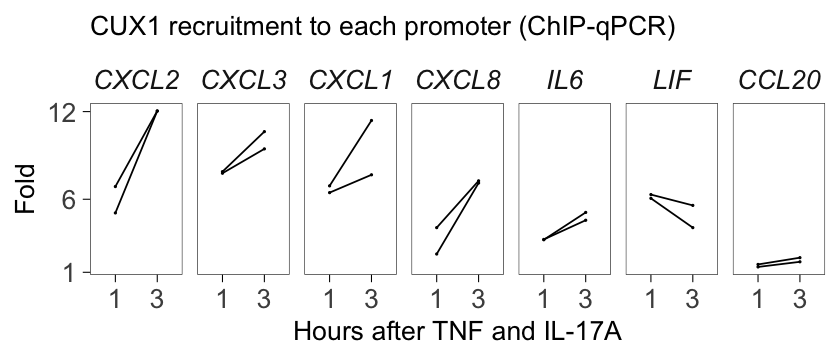

In [52]:
x <- chip_cux1 %>%
group_by(promoter, replicate) %>%
summarize(
  t1 = ddct[time == 1] / ddct[time == 0],
  t3 = ddct[time == 3] / ddct[time == 0]
)
x <- x %>% gather("time", "fold", -promoter, -replicate)
# group_by(promoter, time) %>%
# summarize(fold = mean(fold))

head(x)

x$promoter <- factor(x$promoter, levels = c("CXCL2", "CXCL3", "CXCL1", "CXCL8", "IL6", "LIF", "CCL20"))

p <- ggplot(x) +
aes(x = time, y = fold, group = paste(promoter, replicate)) +
geom_line() +
geom_point(size = 0.25) +
# geom_hline(yintercept = 1, size = 0.2) +
facet_grid(~ promoter) +
# scale_y_continuous(breaks = scales::pretty_breaks(3)) +
scale_y_continuous(breaks = c(1, 6, 12)) +
scale_x_discrete(labels = c(1, 3)) +
# scale_color_discrete(guide = FALSE) +
theme(
  panel.grid.major = element_blank(),
  strip.text = element_text(face = "italic", size = 16),
  plot.title = element_text(size = 16),
  plot.subtitle = element_text(size = 16),
  axis.title = element_text(size = 16),
  axis.text = element_text(size = 16)
) +
labs(
  x = "Hours after TNF and IL-17A",
  y = "Fold",
  subtitle = "CUX1 recruitment to each promoter (ChIP-qPCR)"
)

options(repr.plot.width = 7, repr.plot.height = 3)

show_plot(p, name = "chip-qpcr-fold")

In [53]:
x <- chip_cux1 %>%
filter(promoter %in% c("CXCL2", "CXCL1", "CXCL3")) %>%
filter(time %in% c(0, 3)) %>%
mutate(after = time > 0) %>%
group_by(promoter) %>%
summarize(mean = mean(ddct[after]) / mean(ddct[!after]))

x %>% mutate_if(is.numeric, signif, 3)

x %>% 
summarize(mean(mean)) %>% mutate_if(is.numeric, signif, 3)

promoter,mean
<fct>,<dbl>
CXCL2,12.0
CXCL1,9.4
CXCL3,10.0


mean(mean)
<dbl>
10.5


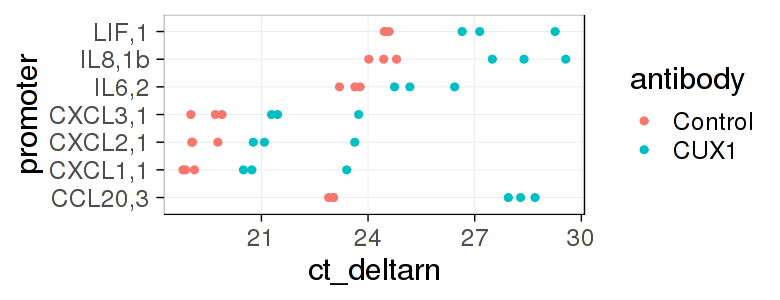

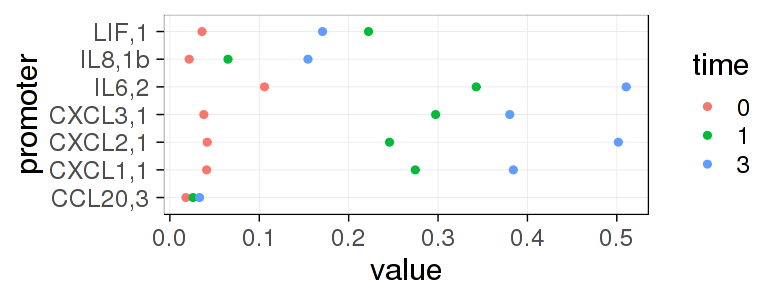

In [43]:
dat <- chip

# Average the 2 technical replicates.
dat %<>%
group_by(date, antibody, promoter, time) %>%
summarise(ct_deltarn = mean(ct_deltarn))

ggplot(dat) +
aes(y = promoter, x = ct_deltarn, color = antibody) +
geom_point()

dat2 <- subset(dat, antibody != "Control")
dat2$ct_deltarn <- dat2$ct_deltarn - dat$ct_deltarn[dat$antibody == "Control"]

dat2$value <- 2 ^ -dat2$ct_deltarn

ggplot(dat2) +
aes(y = promoter, x = value, color = time) +
geom_point()

In [44]:
dat2

date,antibody,promoter,time,ct_deltarn,value
2017-01-03,CUX1,"CCL20,3",0,5.805,0.01788632
2017-01-03,CUX1,"CCL20,3",1,5.270,0.02591624
2017-01-03,CUX1,"CCL20,3",3,4.915,0.03314649
2017-01-03,CUX1,"IL6,2",0,3.240,0.10584316
2017-01-03,CUX1,"IL6,2",1,1.545,0.34269570
2017-01-03,CUX1,"IL6,2",3,0.970,0.51050606
2017-01-03,CUX1,"IL8,1b",0,5.540,0.02149284
2017-01-03,CUX1,"IL8,1b",1,3.945,0.06492869
2017-01-03,CUX1,"IL8,1b",3,2.695,0.15442733
2017-01-03,CUX1,"LIF,1",0,4.800,0.03589682


In [45]:
options(repr.plot.width = 6, repr.plot.height = 2.5)

mat <- as.data.frame(dcast(data = chip, formula = promoter ~ antibody + time + replicate, value.var = "ct_deltarn"))
rownames(mat) <- mat$promoter
mat$promoter <- NULL
mat <- as.matrix(mat)
mat
               
meta <- as.data.frame(str_split_fixed(colnames(mat), "_", 3))
colnames(meta) <- c("antibody", "time", "replicate")
meta
meta$antibody_time <- sprintf("%s_%s", meta$antibody, meta$time)

clean_cols <- function(x) {
  colnames(x) <- str_replace_all(colnames(x), "[()]", "")
  colnames(x) <- str_replace_all(colnames(x), ":", "")
  colnames(x) <- str_replace_all(colnames(x), "antibody", "")
  colnames(x) <- str_replace_all(colnames(x), "cell_line", "")
  colnames(x) <- str_replace_all(colnames(x), "_time", "")
  return(x)
}

des <- clean_cols(with(
  meta,
  model.matrix(~ 0 + antibody_time)
))

print(colnames(des))

fit <- lmFit(object = mat, design = des)
fit <- eBayes(fit)

con <- contrasts.fit(
  fit = fit,
  contrasts = makeContrasts(
    contrasts = c(
      "Control_0 - CUX1_0",
      "Control_1 - CUX1_1",
      "Control_3 - CUX1_3"
    ),
    levels = des
  )
)
con <- eBayes(con)

top <- do.call(rbind, lapply(1:3, function(i) {
  retval <- topTable(con, coef = i, confint = TRUE, n = 7)
  retval$promoter <- rownames(retval)
  retval$time <- c(0, 1, 3)[i]
  retval
}))
top$RQ <- 2 ^ top$logFC
top

# top$gene <- factor(top$gene, levels = rev(c("CUX1", "LIFR", "STAT3", "STAT4")))

# p <- ggplot(top) +
# geom_errorbarh(
#   mapping = aes(xmin = 2 ^ CI.L, xmax = 2 ^ CI.R, y = gene, color = adj.P.Val < 0.05),
#   height = 0, size = 0.3
# ) +
# geom_point(
#   mapping = aes(x = 2 ^ logFC, y = gene, color = adj.P.Val < 0.05)
# ) +
# scale_color_manual(values = c("grey50", "black"), guide = FALSE) +
# facet_grid(~ sirna) +
# geom_vline(xintercept = 1, size = 0.2) +
# # scale_x_continuous(breaks = c(0.5, 1, 2), labels = fractional) +
# # scale_x_log10(breaks = c(0.25, 0.5, 1, 2), labels = fractional) +
# scale_x_log10(labels = function(x) signif(x, 2)) +
# theme(
#   strip.text = element_text(face = "italic"),
#   axis.text.y = element_text(face = "italic"),
#   panel.grid.major = element_line(size = 0.2)
# ) +
# labs(
#   y = NULL, x = "Fold Change",
#   subtitle = "qPCR: siRNA efficiency", this_date
# )
# show_plot(p)
              
# top$efficiency <- sprintf("%.1f%%", 100 * (1 - 2^top$logFC))
# top$efficiencyR <- sprintf("%.1f%%", 100 * (1 - 2^top$CI.L))
# top$efficiencyL <- sprintf("%.1f%%", 100 * (1 - 2^top$CI.R))
# top[top$gene == substr(top$sirna, 4, 10), c("gene", "efficiency", "efficiencyL", "efficiencyR")]

,Control_0_1,Control_0_2,Control_1_1,Control_1_2,Control_3_1,Control_3_2,CUX1_0_1,CUX1_0_2,CUX1_1_1,CUX1_1_2,CUX1_3_1,CUX1_3_2
"CCL20,3",22.89,22.89,22.98,23.06,23.02,23.04,28.64,28.75,28.28,28.30,27.99,27.90
"CXCL1,1",18.73,18.86,18.84,18.89,18.95,19.28,23.23,23.57,20.65,20.81,20.51,20.48
"CXCL2,1",19.05,19.03,19.01,19.11,19.68,19.87,23.68,23.57,21.30,20.87,20.72,20.82
"CXCL3,1",18.96,19.07,19.69,19.72,19.88,19.90,23.70,23.77,21.45,21.46,21.21,21.36
"IL6,2",23.22,23.17,23.60,23.66,23.78,23.77,26.50,26.37,25.19,25.16,24.71,24.78
"IL8,1b",24.12,23.92,24.42,24.46,24.84,24.76,29.62,29.50,28.75,28.02,27.51,27.48
"LIF,1",24.50,24.42,24.49,24.46,24.56,24.62,29.25,29.27,26.64,26.65,27.29,26.99


antibody,time,replicate
Control,0,1
Control,0,2
Control,1,1
Control,1,2
Control,3,1
Control,3,2
CUX1,0,1
CUX1,0,2
CUX1,1,1
CUX1,1,2


[1] "Control_0" "Control_1" "Control_3" "CUX1_0"    "CUX1_1"    "CUX1_3"   


,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,B,promoter,time,RQ
"CCL20,3",-5.805,-5.942631,-5.6673692,25.64500,-96.029199,2.198124e-14,1.538687e-13,23.327955,"CCL20,3",0,0.01788632
"CXCL3,1",-4.720,-4.871636,-4.5683635,20.84750,-70.868794,3.021932e-13,1.057676e-12,21.140354,"CXCL3,1",0,0.03794359
"LIF,1",-4.800,-5.002854,-4.5971458,26.09500,-53.873353,3.210626e-12,6.497436e-12,18.923571,"LIF,1",0,0.03589682
"IL6,2",-3.240,-3.379257,-3.1007434,24.49250,-52.971961,3.712821e-12,6.497436e-12,18.781413,"IL6,2",0,0.10584316
"CXCL2,1",-4.585,-4.879611,-4.2903894,20.55917,-35.432983,1.179038e-10,1.650653e-10,15.257729,"CXCL2,1",0,0.04166558
"CXCL1,1",-4.605,-4.908096,-4.3019041,20.23333,-34.591252,1.449215e-10,1.690750e-10,15.040797,"CXCL1,1",0,0.04109196
"IL8,1b",-5.540,-5.975477,-5.1045226,26.45000,-28.964160,6.635352e-10,6.635352e-10,13.425056,"IL8,1b",0,0.02149284
"CCL20,31",-5.270,-5.407631,-5.1323692,25.64500,-87.178963,5.062563e-14,3.543794e-13,22.668346,"CCL20,3",1,0.02591624
"CXCL3,11",-1.750,-1.901636,-1.5983635,20.84750,-26.275506,1.525980e-09,4.985091e-09,12.530607,"CXCL3,1",1,0.29730178
"IL6,21",-1.545,-1.684257,-1.4057434,24.49250,-25.259778,2.136468e-09,4.985091e-09,12.167552,"IL6,2",1,0.34269570


# ELISA

In [59]:
elisa <- read_excel("data/experiments.xlsx", sheet = "ELISA")
elisa <- clean_names(elisa)
elisa <- subset(elisa, !is.na(elisa$value))
elisa <- unique(elisa)
elisa$filename <- NULL
elisa$date <- as.character(elisa$date)
elisa <- elisa[,apply(elisa, 2, function(x) length(unique(x))) > 1]
elisa$sirna <- elisa$si_rna
                      
ix <- !elisa$sirna %in% c("NFKBIZ,1", "CUX1,2", "LIFR,2")
elisa <- elisa[ix,]

ix <- !elisa$sirna %in% c("Basal", "Control siRNA")
elisa$sirna[ix] <- sprintf("si-%s", elisa$sirna[ix])
                      
   
elisa$sirna <- str_split_fixed(elisa$sirna, ",", 2)[,1]
                      
elisa$sirna <- factor(
  elisa$sirna,
  levels = c(
    "si-STAT4",
    "si-STAT3",
    "si-NFKBIZ",
    "si-LIFR",
    "si-CUX1",
    "si-ELF3",
    "Control siRNA",
    "Basal"
  )
)
head(elisa)
nrow(elisa)

date,cell_line,time,stimulation,si_rna,protein,replicate,value,sirna
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>
2018-08-27,RA1357,24,TNF (0.5ng/mL)+IL-17 (0.5ng/mL),Control siRNA,CCL2,1,56045.45,Control siRNA
2018-08-27,RA1357,24,TNF (0.5ng/mL)+IL-17 (0.5ng/mL),CUX1,CCL2,1,29445.45,si-CUX1
2018-08-27,RA1357,24,TNF (0.5ng/mL)+IL-17 (0.5ng/mL),LIFR,CCL2,1,27081.82,si-LIFR
2018-08-27,RA1357,24,TNF (0.5ng/mL)+IL-17 (0.5ng/mL),STAT3,CCL2,1,40036.36,si-STAT3
2018-08-27,RA1357,24,TNF (0.5ng/mL)+IL-17 (0.5ng/mL),STAT4,CCL2,1,7900.00,si-STAT4
2018-08-27,RA1357,24,TNF (0.5ng/mL)+IL-17 (0.5ng/mL),"NFKBIZ,3",CCL2,1,33100.00,si-NFKBIZ


[1] 324

In [60]:
table(elisa$sirna)


     si-STAT4      si-STAT3     si-NFKBIZ       si-LIFR       si-CUX1 
           44            44            44            44            44 
      si-ELF3 Control siRNA         Basal 
           32            60            12 

Writing notebooks/figures/9c849.png
Writing notebooks/figures/9c849.pdf


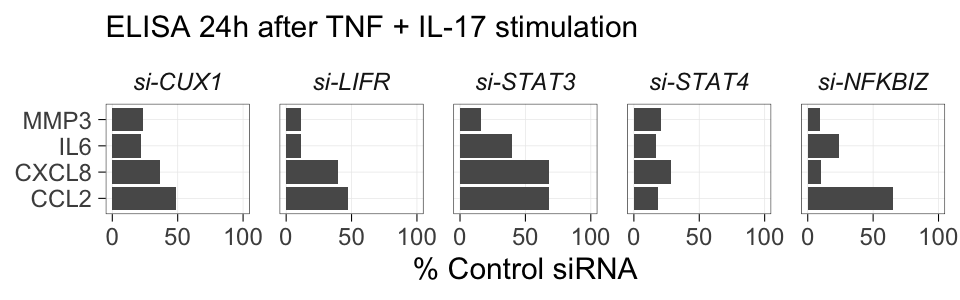

In [61]:
elisa_fc <- elisa %>% filter(sirna != "Basal")

elisa_fc <- elisa_fc %>%
filter(stimulation == "TNF (0.5ng/mL)+IL-17 (0.5ng/mL)") %>%
group_by(protein, replicate) %>%
mutate(value = value / value[sirna == "Control siRNA"]) %>%
filter(sirna != "Control siRNA")

elisa_fc$sirna <- factor(
  elisa_fc$sirna,
  c("si-CUX1", "si-LIFR", "si-STAT3", "si-STAT4", "si-NFKBIZ")
)

#elisa_fc

options(repr.plot.width = 8, repr.plot.height = 2.5)

p <- ggplot() +
geom_colh(
  data = elisa_fc %>% group_by(protein, sirna) %>% summarise(value = mean(value, na.rm = TRUE)),
  mapping = aes(y = protein, x = value * 100)
) +
# geom_point(
#   data = elisa_fc,
#   mapping = aes(y = protein, x = value * 100),
#   shape = '|'
# ) +
facet_grid(~ sirna) +
scale_x_continuous(breaks = c(0, 50, 100), limits = c(0, 100)) +
theme(strip.text = element_text(face = "italic"), panel.spacing.x = unit(1.25, "lines")) +
labs(
  x = "% Control siRNA",
  y = NULL,
  subtitle = "ELISA 24h after TNF + IL-17 stimulation"
)

show_plot(p)

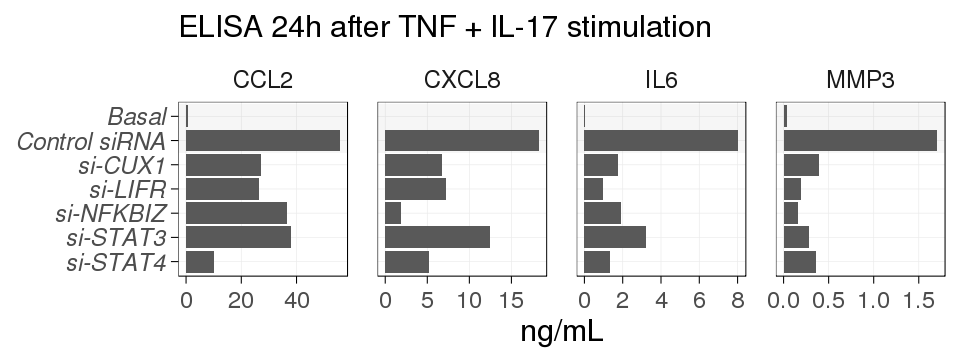

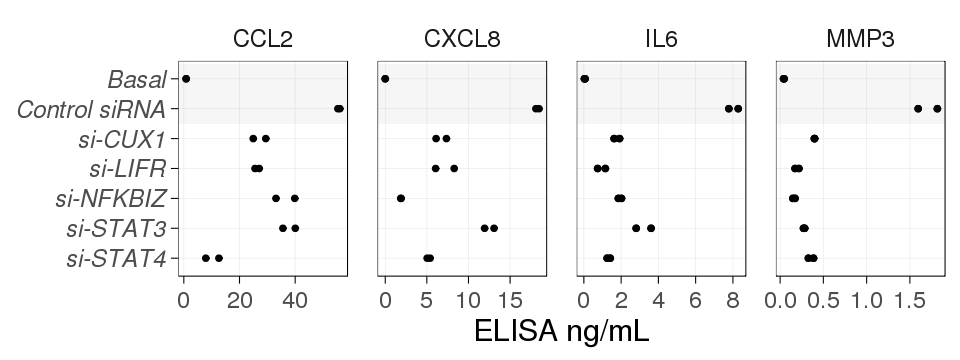

In [62]:
options(repr.plot.width = 8, repr.plot.height = 3)

mydata <- elisa %>%
filter(stimulation == "TNF (0.5ng/mL)+IL-17 (0.5ng/mL)") %>%
group_by(sirna, protein) %>%
summarise(value = mean(value, na.rm = TRUE))

p <- ggplot(mydata) +
aes(y = sirna, x = value / 1000) +
geom_colh() +
annotate(
  geom = "rect",
  xmin = -Inf, xmax = Inf, ymin = 5.5, ymax = 7.5,
  alpha = 0.05
) +
facet_grid(~ protein, scale = "free_x") +
# scale_x_log10() + #breaks = scales::pretty_breaks(3)) +
theme(axis.text.y = element_text(face = "italic"), panel.spacing.x = unit(1.25, "lines")) +
labs(
  x = "ng/mL",
  y = NULL,
  subtitle = "ELISA 24h after TNF + IL-17 stimulation"
)

show_plot(p)

mydata <- elisa %>%
filter(stimulation == "TNF (0.5ng/mL)+IL-17 (0.5ng/mL)")

p <- ggplot(mydata) +
aes(y = sirna, x = value / 1000) +
geom_point() +
annotate(
  geom = "rect",
  xmin = -Inf, xmax = Inf, ymin = 5.5, ymax = 7.5,
  alpha = 0.05
) +
facet_grid(~ protein, scale = "free_x") +
# scale_x_log10() + #breaks = scales::pretty_breaks(3)) +
theme(axis.text.y = element_text(face = "italic"), panel.spacing.x = unit(1.25, "lines")) +
labs(
  x = "ELISA ng/mL",
  y = NULL
)

show_plot(p)

# A tibble: 48 x 6
# Groups:   time, stimulation, sirna [?]
    time stimulation    sirna    protein mean_value stderr
   <int> <chr>          <fct>    <chr>        <dbl>  <dbl>
 1     6 TNF (0.1ng/mL) si-STAT4 CXCL8         45.5  12.3 
 2     6 TNF (0.1ng/mL) si-STAT4 IL6           68.3  31.7 
 3     6 TNF (0.1ng/mL) si-STAT3 CXCL8         87.7  22.1 
 4     6 TNF (0.1ng/mL) si-STAT3 IL6           79.8  36.6 
 5     6 TNF (0.1ng/mL) si-LIFR  CXCL8         80.5  17.3 
 6     6 TNF (0.1ng/mL) si-LIFR  IL6           24.3  16.0 
 7     6 TNF (0.1ng/mL) si-CUX1  CXCL8         31.8   5.38
 8     6 TNF (0.1ng/mL) si-CUX1  IL6           21.4  12.6 
 9     6 TNF (0.1ng/mL) si-ELF3  CXCL8         66.6  14.9 
10     6 TNF (0.1ng/mL) si-ELF3  IL6           76.8  29.4 
# ... with 38 more rows


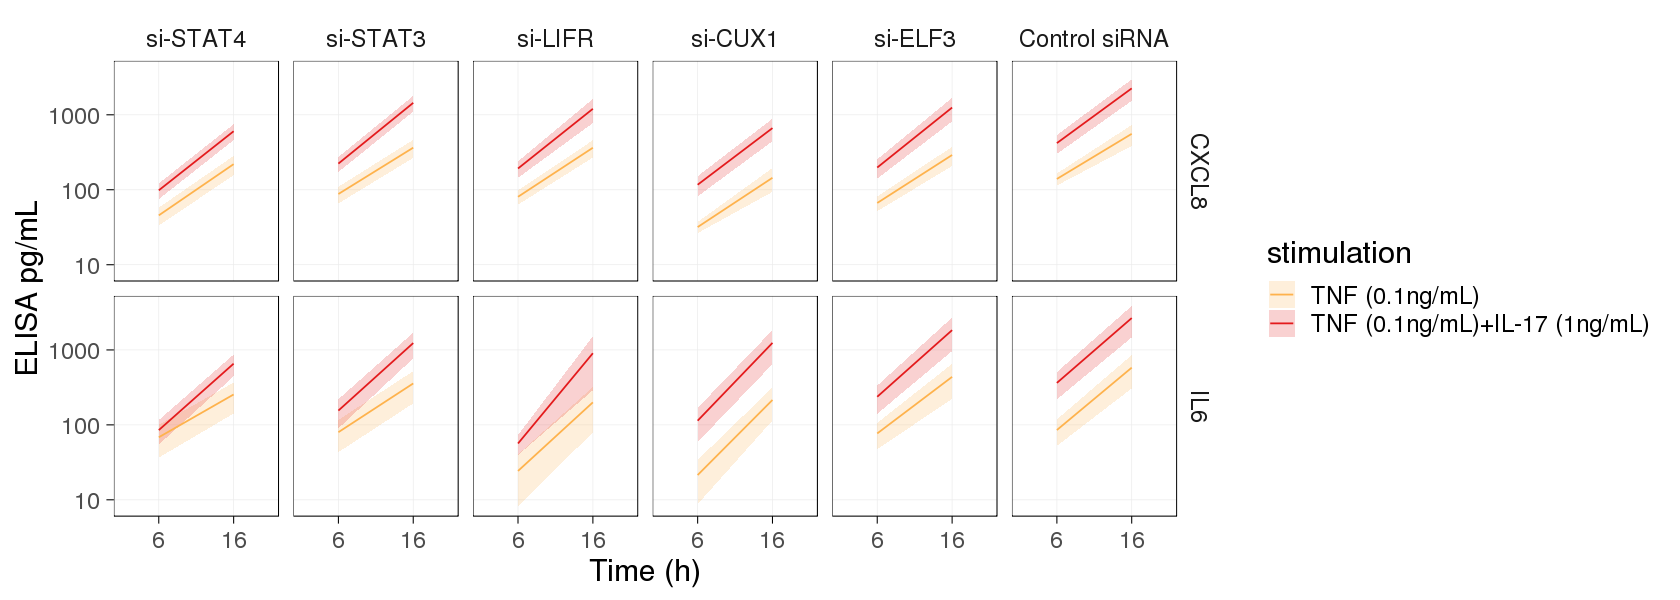

In [64]:
mydata <- elisa %>%
filter(stimulation != "TNF (0.5ng/mL)+IL-17 (0.5ng/mL)") %>%
filter(time != "24") %>%
# filter(protein == "IL6") %>%
group_by(time, stimulation, sirna, protein) %>%
summarise(mean_value = mean(value), stderr = sd(value) / sqrt(length(value))) %>%
print()

options(repr.plot.width = 14, repr.plot.height = 5)

p <- ggplot(mydata) +
aes(x = factor(time), y = mean_value, ymin = mean_value - stderr, ymax = mean_value + stderr, color = stimulation, fill = stimulation, group = stimulation) +
geom_ribbon(color = NA, alpha = 0.2) +
geom_line() +
facet_grid(protein ~ sirna) +
scale_y_log10() +
scale_color_manual(values = qpcr_colors$stimulation) +
scale_fill_manual(values = qpcr_colors$stimulation) +
labs(
  y = "ELISA pg/mL",
  x = "Time (h)"
)

show_plot(p)

 [1] "Control"  "CUX1"     "ELF3"     "LIFR"     "STAT3"    "STAT4"   
 [7] "time6"    "RA160425" "RA355"    "RA3916"  


,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,B,protein,sirna
CXCL8,-0.5880546,-0.7989041,-0.377205221,-2.347758,-5.530775,2.397159e-07,4.794317e-07,6.6071773,CXCL8,si-CUX1
IL6,-0.4842663,-0.7476602,-0.220872374,-2.199299,-3.646021,4.181967e-04,4.181967e-04,-0.4816024,IL6,si-CUX1
IL61,-0.6762684,-0.9396623,-0.412874480,-2.199299,-5.091598,1.592709e-06,3.185418e-06,4.8386108,IL6,si-LIFR
CXCL81,-0.2687132,-0.4795626,-0.057863806,-2.347758,-2.527303,1.300216e-02,1.300216e-02,-3.5408654,CXCL8,si-LIFR
CXCL82,-0.2092338,-0.4200832,0.001615598,-2.347758,-1.967887,5.174867e-02,6.499926e-02,-3.9172596,CXCL8,si-STAT3
IL62,-0.2477165,-0.5111105,0.015677413,-2.199299,-1.865048,6.499926e-02,6.499926e-02,-4.0798245,IL6,si-STAT3
CXCL83,-0.5224698,-0.7333192,-0.311620341,-2.347758,-4.913936,3.346082e-06,6.692164e-06,4.1511315,CXCL8,si-STAT4
IL63,-0.4308726,-0.6942666,-0.167478696,-2.199299,-3.244023,1.585972e-03,1.585972e-03,-1.6180242,IL6,si-STAT4
CXCL84,-0.3148340,-0.5256834,-0.103984569,-2.347758,-2.961079,3.799748e-03,7.599497e-03,-2.0477964,CXCL8,si-ELF3
IL64,-0.1385731,-0.4019671,0.124820793,-2.199299,-1.043312,2.992277e-01,2.992277e-01,-5.5446865,IL6,si-ELF3


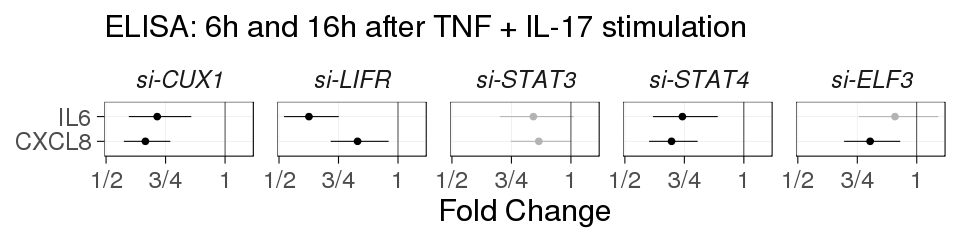

In [65]:
dat <- elisa %>%
filter(stimulation != "TNF (0.5ng/mL)+IL-17 (0.5ng/mL)") %>%
filter(time != "24")

# # Average 2 technical replicates.
# dat <- dat %>%
# group_by(cell_line, sirna, protein) %>%
# summarise(cq_deltarn = mean(cq_deltarn))

dat$sample <- sprintf("%s_%s_%s_%s", dat$cell_line, dat$sirna, dat$time, dat$stimulation)
#head(dat)
                   
mat <- as.data.frame(dcast(data = dat, formula = protein ~ sample, value.var = "value"))
rownames(mat) <- mat$protein
mat$protein <- NULL
mat <- -log10(as.matrix(mat) + 1)
#mat
               
meta <- as.data.frame(str_split_fixed(colnames(mat), "_", 4))
colnames(meta) <- c("cell_line", "sirna", "time", "stimulation")
#meta
clean_cols <- function(x) {
  colnames(x) <- str_replace_all(colnames(x), "[()]", "")
  colnames(x) <- str_replace_all(colnames(x), ":", "")
  colnames(x) <- str_replace_all(colnames(x), "sirna", "")
  colnames(x) <- str_replace_all(colnames(x), " siRNA", "")
  colnames(x) <- str_replace_all(colnames(x), "si-", "")
  colnames(x) <- str_replace_all(colnames(x), "cell_line", "")
  return(x)
}

des <- clean_cols(with(
  meta,
  model.matrix(~ 0 + sirna + time + cell_line)
))

print(colnames(des))

fit <- lmFit(object = mat, design = des)
fit <- eBayes(fit)

con <- contrasts.fit(
  fit = fit,
  contrasts = makeContrasts(
    contrasts = c(
      "Control - CUX1",
      "Control - LIFR",
      "Control - STAT3",
      "Control - STAT4",
      "Control - ELF3"
    ),
    levels = des
  )
)
con <- eBayes(con)

top <- do.call(rbind, lapply(1:5, function(i) {
  retval <- topTable(con, coef = i, confint = TRUE, n = 7)
  retval$protein <- rownames(retval)
  retval$sirna <- c("si-CUX1", "si-LIFR", "si-STAT3", "si-STAT4", "si-ELF3")[i]
  retval
}))

top$sirna <- factor(top$sirna, c("si-CUX1", "si-LIFR", "si-STAT3", "si-STAT4", "si-ELF3"))

top

p <- ggplot(top) +
geom_errorbarh(
  mapping = aes(xmin = 2 ^ CI.L, xmax = 2 ^ CI.R, y = protein, color = adj.P.Val < 0.05),
  width = 0, size = 0.3
) +
geom_point(
  mapping = aes(x = 2 ^ logFC, y = protein, color = adj.P.Val < 0.05)
) +
scale_color_manual(values = c("grey70", "black"), guide = FALSE) +
facet_grid(~ sirna) +
geom_vline(xintercept = 1, size = 0.2) +
scale_x_continuous(breaks = c(0.5, 0.75, 1, 2), labels = fractional) +
theme(
  panel.spacing.x = unit(1, "lines"),
  strip.text = element_text(face = "italic"),
  panel.grid.major = element_line(size = 0.2)
) +
labs(
  y = NULL, x = "Fold Change",
  subtitle = "ELISA: 6h and 16h after TNF + IL-17 stimulation"
)

options(repr.plot.width = 8, repr.plot.height = 2)

show_plot(p)

# NFKBIZ

## ELISA of MMP3, IL6, CXCL8

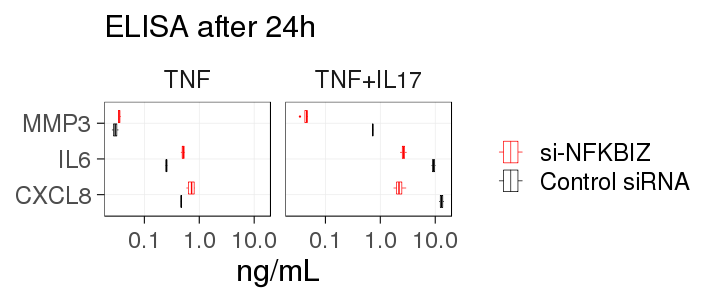

In [67]:
options(repr.plot.width = 6, repr.plot.height = 2.5)

dat <- elisa %>%
filter(date == "2018-08-16") %>%
filter(stimulation != "Basal") %>%
filter(stimulation != "TNF (0.5ng/mL)+IL-17 (0.5ng/mL)") %>%
mutate(pg = value, ng = value / 1000)
# dat

dat$stim <- dat$stimulation
dat$stim[dat$stim == "TNF (0.1ng/mL)"] <- "TNF"
dat$stim[dat$stim == "TNF (0.1ng/mL)+IL-17 (1ng/mL)"] <- "TNF+IL17"

p <- ggplot(dat) +
aes(y = protein, x = ng, group = paste(protein, sirna), color = sirna) +
geom_boxploth(size = 0.2, outlier.size = 0) +
# geom_point(size = 0.1, position = position_dodgev(height = 0.5)) +
scale_color_manual(values = c("red", "black"), name = NULL) +
scale_x_log10() +
facet_wrap(~ stim) +
labs(x = "ng/mL", y = NULL, subtitle = "ELISA after 24h")
# labs(x = bquote("Log"[10]~"pg/mL"), y = NULL, subtitle = "ELISA after 24h")

show_plot(p)

[1] "ControlstimTNF"     "NFKBIZstimTNF"      "ControlstimTNFIL17"
[4] "NFKBIZstimTNFIL17" 


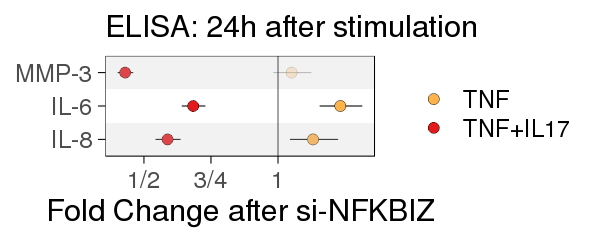

In [80]:
dat <- elisa %>%
filter(date == "2018-08-16") %>%
filter(stimulation != "Basal") %>%
filter(stimulation != "TNF (0.5ng/mL)+IL-17 (0.5ng/mL)") %>%
mutate(pg = value, ng = value / 1000)

dat$stim <- dat$stimulation
dat$stim[dat$stim == "TNF (0.1ng/mL)"] <- "TNF"
dat$stim[dat$stim == "TNF (0.1ng/mL)+IL-17 (1ng/mL)"] <- "TNFIL17"

dat$rep <- rep(c(1,2,1,2,3,4), 6)
dat$sample <- sprintf("%s_%s_%s_%s_%s", dat$cell_line, dat$sirna, dat$time, dat$stim, dat$rep)
         
mat <- as.data.frame(dcast(data = dat, formula = protein ~ sample, value.var = "value"))
rownames(mat) <- mat$protein
mat$protein <- NULL
mat <- log10(as.matrix(mat) + 1)
# mat
               
meta <- as.data.frame(str_split_fixed(colnames(mat), "_", 5))
colnames(meta) <- c("cell_line", "sirna", "time", "stim", "rep")
# meta
clean_cols <- function(x) {
  colnames(x) <- str_replace_all(colnames(x), "[()]", "")
  colnames(x) <- str_replace_all(colnames(x), ":", "")
  colnames(x) <- str_replace_all(colnames(x), "sirna", "")
  colnames(x) <- str_replace_all(colnames(x), " siRNA", "")
  colnames(x) <- str_replace_all(colnames(x), "si-", "")
  colnames(x) <- str_replace_all(colnames(x), "cell_line", "")
  return(x)
}

des <- clean_cols(with(
  meta,
  model.matrix(~ 0 + sirna:stim)
))

print(colnames(des))

fit <- lmFit(object = mat, design = des)
fit <- eBayes(fit)

con <- contrasts.fit(
  fit = fit,
  contrasts = makeContrasts(
    contrasts = c(
      "NFKBIZstimTNF - ControlstimTNF",
      "NFKBIZstimTNFIL17 - ControlstimTNFIL17"
    ),
    levels = des
  )
)
con <- eBayes(con)

top <- do.call(rbind, lapply(1:2, function(i) {
  retval <- topTable(con, coef = i, confint = TRUE, n = 7)
  retval$protein <- rownames(retval)
  retval$stim <- c("TNF", "TNF+IL17")[i]
  retval
}))

p <- ggplot(top) +
geom_errorbar(
  mapping = aes(ymin = 2 ^ CI.L, ymax = 2 ^ CI.R, x = protein, alpha = adj.P.Val < 0.05),
  width = 0, size = 0.3
) +
geom_point(
  mapping = aes(y = 2 ^ logFC, x = protein, alpha = adj.P.Val < 0.05, fill = stim),
  shape = 21, size = 3, stroke = 0.2
) +
annotate(
  geom = "rect",
  xmin = seq(0.5, 3, by = 2),
  xmax = seq(0.5, 3, by = 2) + 1,
  ymin = -Inf, ymax = Inf,
  fill = "grey80",
  alpha = 0.25
) +
scale_alpha_manual(values = c(0.3, 1), guide = FALSE) +
scale_fill_manual(values = unname(qpcr_colors$stimulation[2:3]), name = NULL) +
geom_hline(yintercept = 1, size = 0.2) +
scale_y_continuous(breaks = c(0.5, 0.75, 1, 2), labels = fractional) +
scale_x_discrete(expand = c(0, 0), labels = c("MMP3" = "MMP-3", "IL6" = "IL-6", "CXCL8" = "IL-8")) +
coord_flip() +
theme(
  panel.spacing.x = unit(1, "lines"),
  strip.text = element_text(face = "italic"),
  panel.grid.major = element_blank()
) +
labs(
  x = NULL, y = "Fold Change after si-NFKBIZ",
  subtitle = "ELISA: 24h after stimulation"
)

options(repr.plot.width = 5, repr.plot.height = 2)

# show_plot(p, res = 300)
show_plot(p)

In [81]:
topTable(con, coef = 1) %>%
tibble::rownames_to_column("protein") %>%
mutate(fc = 2 ^ logFC)

topTable(con, coef = 2) %>%
tibble::rownames_to_column("protein") %>%
mutate(fc = 2 ^ logFC)

protein,logFC,AveExpr,t,P.Value,adj.P.Val,B,fc
IL6,0.30163126,3.104167,6.693051,6.362362e-07,1.908709e-06,6.047147,1.232537
CXCL8,0.17743834,3.197485,3.197704,3.862094e-03,5.793141e-03,-2.493983,1.130874
MMP3,0.07168719,1.791081,1.514991,1.428352e-01,1.428352e-01,-5.745596,1.050945


protein,logFC,AveExpr,t,P.Value,adj.P.Val,B,fc
MMP3,-1.2179367,1.791081,-25.73909,5.461083e-19,1.638325e-18,33.45581,0.4298971
CXCL8,-0.7660057,3.197485,-13.80457,6.528160e-13,9.792240e-13,19.09029,0.5880433
IL6,-0.5484907,3.104167,-12.17074,9.323925e-12,9.323925e-12,16.35105,0.6837350


# Migration

In [63]:
migration <- read_excel("data/experiments.xlsx", sheet = "Migration")
migration <- clean_names(migration)
migration$filename <- NULL
migration$date <- as.character(migration$date)
migration <- migration[,apply(migration, 2, function(x) length(unique(x))) > 1]
migration$sirna <- migration$si_rna
                              
ix <- !migration$sirna %in% c("NFKBIZ,1")
migration <- migration[ix,]

ix <- !migration$sirna %in% c("Basal", "Control siRNA")
migration$sirna[ix] <- sprintf("si-%s", migration$sirna[ix])
    
migration$sirna <- str_split_fixed(migration$sirna, ",", 2)[,1]

migration <- migration %>% filter(date != "2018-04-12")

migration$sirna <- factor(
  migration$sirna,
  levels = c(
    "si-STAT4",
    "si-STAT3",
    "si-NFKBIZ",
    "si-LIFR",
    "si-CUX1",
    "Control siRNA",
    "Basal"
  )
)
head(migration)

date,cell_type,si_rna,replicate,cells_per_bead,multiplier,cells,sirna
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2018-09-11,Neutrophil,Control siRNA,1,31.33333,2500,78333.33,Control siRNA
2018-09-11,Neutrophil,CUX1,1,11.71429,2500,29285.71,si-CUX1
2018-09-11,Neutrophil,LIFR,1,13.19841,2500,32996.03,si-LIFR
2018-09-11,Neutrophil,STAT3,1,21.30380,2500,53259.49,si-STAT3
2018-09-11,Neutrophil,STAT4,1,15.36697,2500,38417.43,si-STAT4
2018-09-11,Neutrophil,"NFKBIZ,3",1,10.68831,2500,26720.78,si-NFKBIZ


In [64]:
table(migration$sirna, migration$cell_type)

               
                Monocyte Neutrophil
  si-STAT4             3          2
  si-STAT3             3          2
  si-NFKBIZ            3          2
  si-LIFR              3          2
  si-CUX1              3          2
  Control siRNA        3          2
  Basal                3          2

In [89]:
migration

date,cell_type,sirna,replicate,cells_per_bead,multiplier,cells
2018-09-11,Neutrophil,Control siRNA,1,31.333333,2500,78333.3333
2018-09-11,Neutrophil,si-CUX1,1,11.714286,2500,29285.7143
2018-09-11,Neutrophil,si-LIFR,1,13.198413,2500,32996.0318
2018-09-11,Neutrophil,si-STAT3,1,21.303797,2500,53259.4937
2018-09-11,Neutrophil,si-STAT4,1,15.366972,2500,38417.4312
2018-09-11,Neutrophil,si-NFKBIZ,1,10.688312,2500,26720.7792
2018-09-11,Neutrophil,Basal,1,8.605678,2500,21514.1956
2018-09-11,Neutrophil,Control siRNA,2,38.617021,2500,96542.5525
2018-09-11,Neutrophil,si-CUX1,2,7.832000,2500,19580.0000
2018-09-11,Neutrophil,si-LIFR,2,9.600592,2500,24001.4793


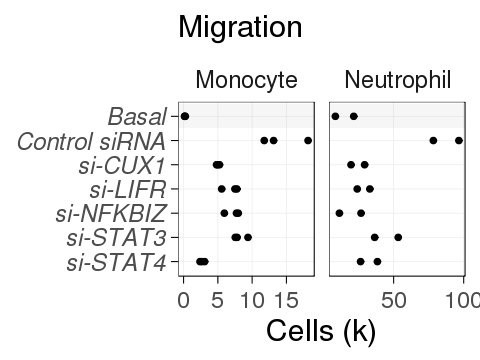

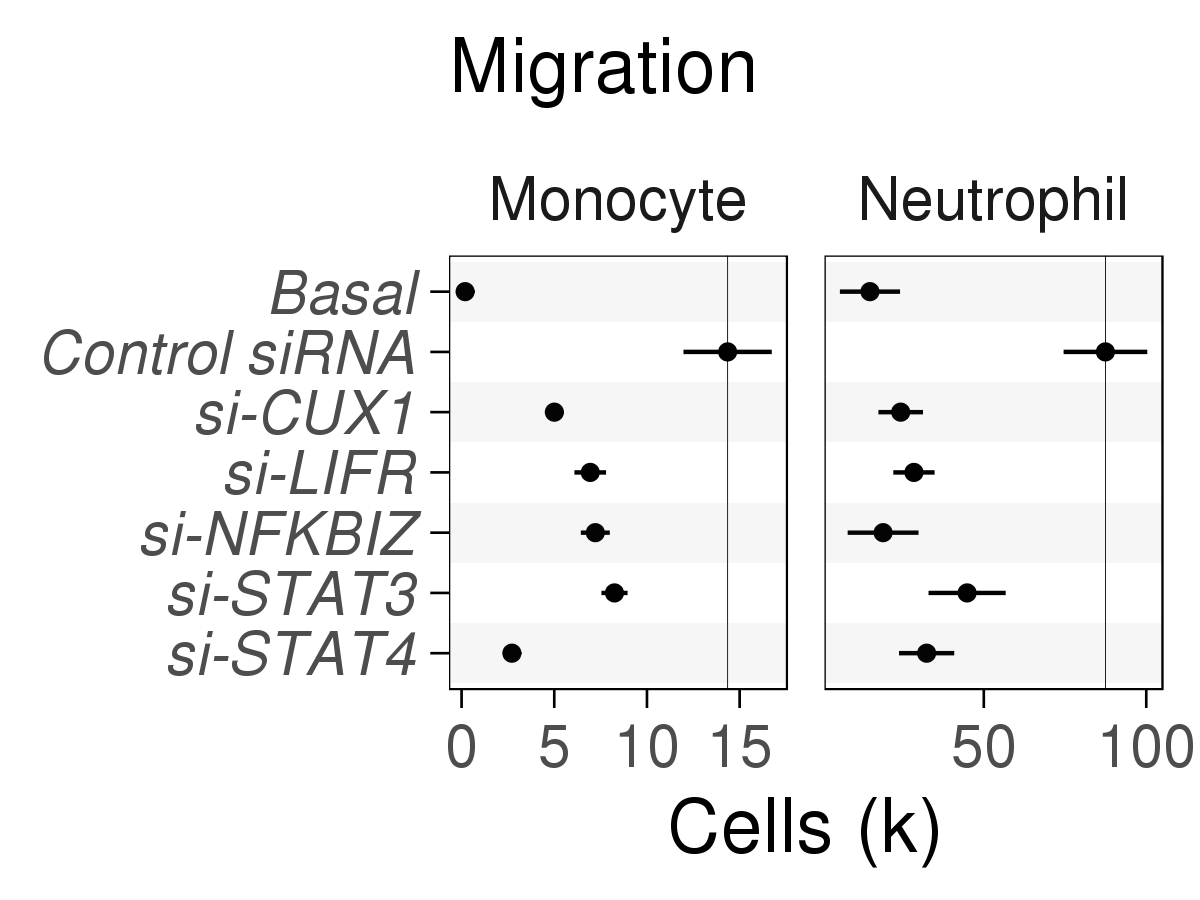

In [183]:
options(repr.plot.width = 4, repr.plot.height = 3)

migration_mean <- migration %>%
group_by(sirna, cell_type) %>%
summarize(
  mean = mean(cells / 1e3),
#   low = min(cells / 1e3),
#   high = max(cells / 1e3)
  low = mean(cells / 1e3) - sem(cells / 1e3),
  high = mean(cells / 1e3) + sem(cells / 1e3)
)

p <- ggplot(migration) +
aes(x = sirna, y = cells / 1e3) +
# geom_line(aes(group = paste(date, replicate))) +
geom_point() +
annotate(
  geom = "rect",
  ymin = -Inf, ymax = Inf, xmin = 6.5, xmax = 7.5,
  alpha = 0.05
) +
coord_flip() +
scale_y_continuous(breaks = scales::pretty_breaks(n = 3)) +
facet_grid(~ cell_type, scales = "free_x") +
theme(axis.text.y = element_text(face = "italic")) +
labs(
  y = "Cells (k)",
  x = NULL,
  subtitle = "Migration"
)

show_plot(p)

p <- ggplot(migration_mean) +
aes(x = sirna, ymin = low, ymax = high, y = mean) +
geom_errorbar(width = 0, size = 0.5) +
# geom_line(aes(group = paste(date, replicate))) +
geom_point() +
geom_hline(
  data = migration_mean %>% filter(sirna == "Control siRNA"),
  mapping = aes(yintercept = mean),
  size = 0.1
) +
annotate(
  geom = "rect",
  ymin = -Inf, ymax = Inf,
  xmin = seq(0.5, 7, by = 2),
  xmax = seq(0.5, 7, by = 2) + 1,
  alpha = 0.05
) +
coord_flip() +
scale_y_continuous(breaks = scales::pretty_breaks(n = 3)) +
facet_grid(~ cell_type, scales = "free_x") +
theme(axis.text.y = element_text(face = "italic"), panel.grid.major = element_blank()) +
labs(
  y = "Cells (k)",
  x = NULL,
  subtitle = "Migration"
)

show_plot(p, res = 300)

In [184]:
library(patchwork)

## Migration: *CCL2* and *CXCL8*

In [185]:
ccl2 <- readr::read_tsv("sirna	Rep1	Rep2
Control siRNA	56045.45455	55336.36364
si-CUX1	29445.45455	24936.36364
si-LIFR	27081.81818	25572.72727
si-STAT3	40036.36364	35600
si-STAT4	7900	12609.09091
si-NFKBIZ,1	25636.36364	24563.63636
si-NFKBIZ,3	33100	39845.45455
Basal	815.4545455	863.6363636")
ccl2$protein <- "CCL2"

cxcl8 <- readr::read_tsv("sirna	Rep1	Rep2
Control siRNA	18476.66667	18098.33333
si-CUX1	7353.333333	6111.666667
si-LIFR	6056.666667	8286.666667
si-STAT3	13075	11938.33333
si-STAT4	5396.666667	5038.333333
si-NFKBIZ,1	4480	3961.666667
si-NFKBIZ,3	1865	1913.333333
Basal	4.433333333	4.166666667")
cxcl8$protein <- "IL-8 (CXCL8)"

mig_elisa <- rbind(ccl2, cxcl8)
mig_elisa <- mig_elisa %>% gather("rep", "value", -sirna, -protein)

mig_elisa <- mig_elisa %>% filter(sirna != "si-NFKBIZ,1")
mig_elisa$sirna[mig_elisa$sirna == "si-NFKBIZ,3"] <- "si-NFKBIZ"

mig_elisa$sirna <- factor(
  mig_elisa$sirna,
  levels = c(
    "si-STAT4",
    "si-STAT3",
    "si-NFKBIZ",
    "si-LIFR",
    "si-CUX1",
    "Control siRNA",
    "Basal"
  )
)
head(mig_elisa)

sirna,protein,rep,value
Control siRNA,CCL2,Rep1,56045.45
si-CUX1,CCL2,Rep1,29445.45
si-LIFR,CCL2,Rep1,27081.82
si-STAT3,CCL2,Rep1,40036.36
si-STAT4,CCL2,Rep1,7900.00
si-NFKBIZ,CCL2,Rep1,33100.00


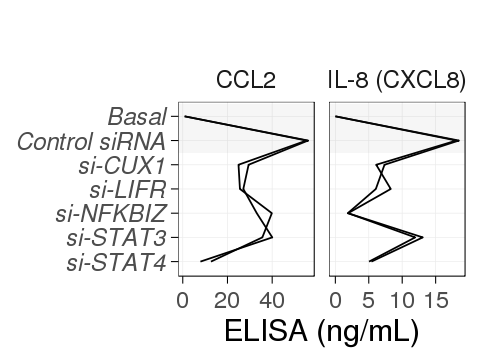

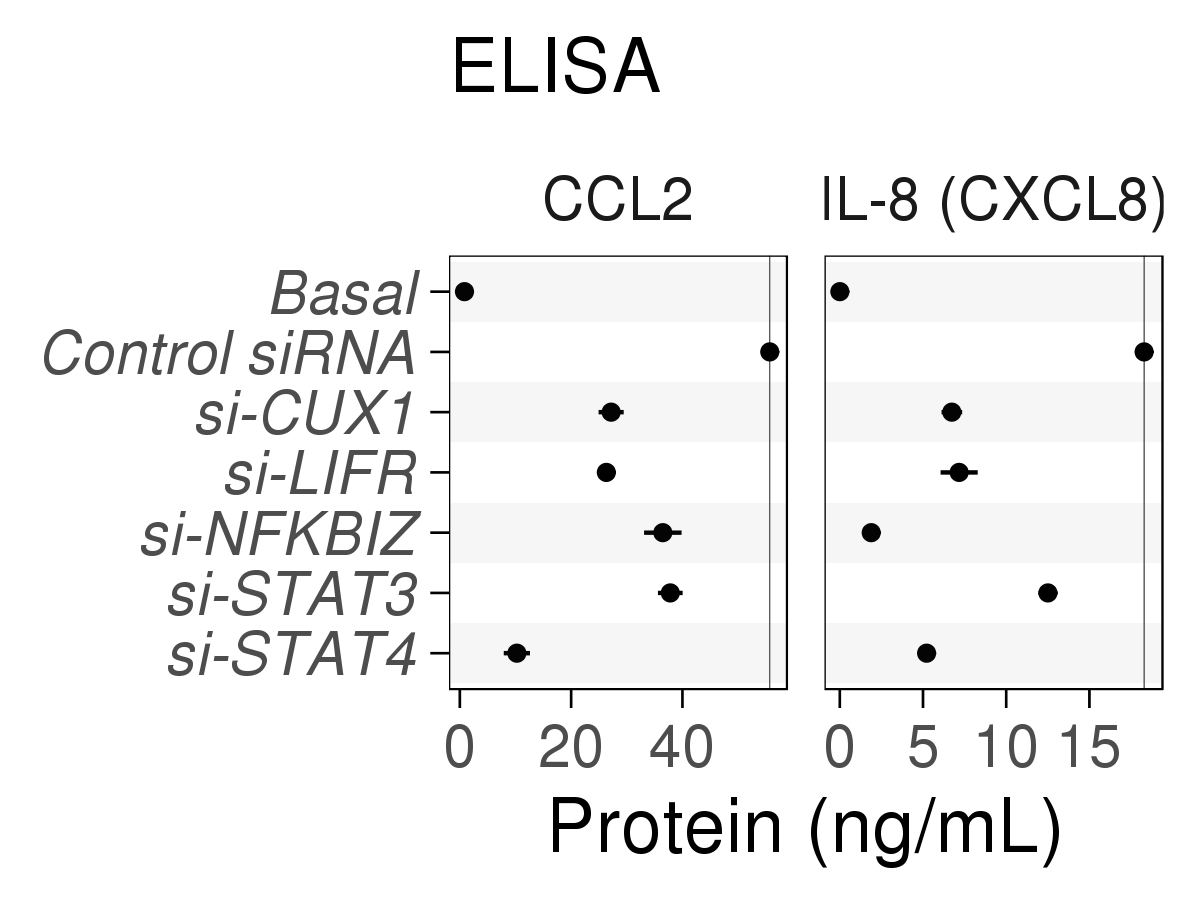

In [186]:
options(repr.plot.width = 4, repr.plot.height = 3)

p <- ggplot(mig_elisa) +
aes(x = sirna, y = value / 1e3) +
geom_line(aes(group = rep)) +
# geom_point() +
annotate(
  geom = "rect",
  ymin = -Inf, ymax = Inf, xmin = 5.5, xmax = 7.5,
  alpha = 0.05
) +
coord_flip() +
scale_y_continuous(breaks = scales::pretty_breaks(n = 3)) +
facet_grid(~ protein, scales = "free_x") +
theme(axis.text.y = element_text(face = "italic")) +
labs(
  y = "ELISA (ng/mL)",
  x = NULL,
  subtitle = ""
)

show_plot(p)

mig_elisa_mean <- mig_elisa %>%
group_by(sirna, protein) %>%
summarize(
  low = min(value / 1e3),
  mean = mean(value / 1e3),
  high = max(value / 1e3)
)

p <- ggplot(mig_elisa_mean) +
aes(x = sirna, ymin = low, ymax = high, y = mean) +
geom_errorbar(width = 0, size = 0.5) +
# geom_line(aes(group = paste(date, replicate))) +
geom_point() +
geom_hline(
  data = mig_elisa_mean %>% filter(sirna == "Control siRNA"),
  mapping = aes(yintercept = mean),
  size = 0.1
) +
annotate(
  geom = "rect",
  ymin = -Inf, ymax = Inf,
  xmin = seq(0.5, 7, by = 2),
  xmax = seq(0.5, 7, by = 2) + 1,
  alpha = 0.05
) +
coord_flip() +
scale_y_continuous(breaks = scales::pretty_breaks(n = 3)) +
facet_grid(~ protein, scales = "free_x") +
theme(
  axis.text.y = element_text(face = "italic"),
  panel.grid.major = element_blank()
) +
labs(
  y = "Protein (ng/mL)",
  x = NULL,
  subtitle = "ELISA"
)

show_plot(p, res = 300)

In [187]:
x <- mig_elisa %>%
spread(key = "sirna", value = "value") %>%
filter(protein == "CCL2")

do.call(rbind, lapply(c("si-STAT4", "si-STAT3", "si-NFKBIZ", "si-LIFR", "si-CUX1"), function(this_sirna) {
  retval <- broom::tidy(t.test(x[[this_sirna]], x[["Control siRNA"]]))
  retval$sirna <- this_sirna
  retval
}))

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative,sirna
-45436.36,10254.55,55690.91,-19.082175,0.029435437,1.045325,-72760.44,-18112.286,Welch Two Sample t-test,two.sided,si-STAT4
-17872.73,37818.18,55690.91,-7.956385,0.072327453,1.051062,-43338.19,7592.734,Welch Two Sample t-test,two.sided,si-STAT3
-19218.18,36472.73,55690.91,-5.666888,0.107436125,1.022098,-60168.47,21732.109,Welch Two Sample t-test,two.sided,si-NFKBIZ
-29363.64,26327.27,55690.91,-35.221230,0.004610957,1.421049,-34789.19,-23938.084,Welch Two Sample t-test,two.sided,si-LIFR
-28500.00,27190.91,55690.91,-12.487661,0.045359908,1.049430,-54462.06,-2537.936,Welch Two Sample t-test,two.sided,si-CUX1



	Pearson's product-moment correlation

data:  d_p1$mean.x and d_p1$mean.y
t = 9.6574, df = 5, p-value = 0.000202
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8303657 0.9963288
sample estimates:
      cor 
0.9742266 


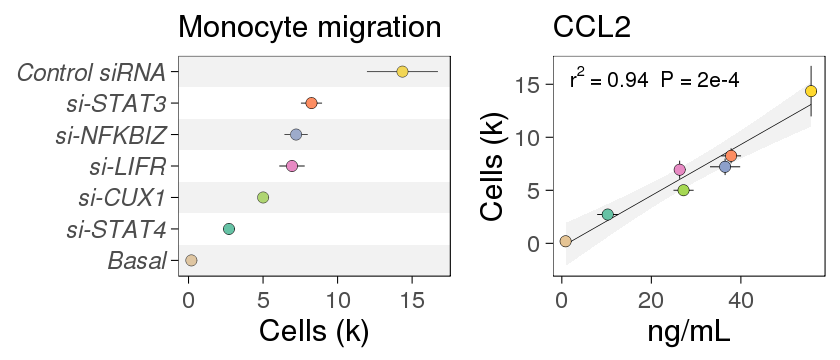

In [188]:
# migration_mean
# mig_elisa_mean
migration_mean$protein <- c("Monocyte" = "CCL2", "Neutrophil" = "IL-8 (CXCL8)")[migration_mean$cell_type]


options(repr.plot.width = 7, repr.plot.height = 3)

d_p0 <- migration_mean %>%
filter(cell_type == "Monocyte")
# mutate(sirna = factor(sirna, rev(levels(sirna))))

p0 <- ggplot(d_p0) +
aes(x = reorder(sirna, mean), ymin = low, ymax = high, y = mean, fill = sirna) +
geom_errorbar(width = 0, size = 0.25) +
# geom_line(aes(group = paste(date, replicate))) +
geom_point(shape = 21, size = 3, stroke = 0.25) +
# geom_hline(
#   data = migration_mean %>% filter(sirna == "Control siRNA"),
#   mapping = aes(yintercept = mean),
#   size = 0.1
# ) +
# scale_x_continuous(trans = "reverse") +
annotate(
  geom = "rect",
  ymin = -Inf, ymax = Inf,
  xmin = seq(0.5, 7, by = 2),
  xmax = seq(0.5, 7, by = 2) + 1,
  fill = "grey80",
  alpha = 0.25
) +
coord_flip() +
# scale_fill_discrete(palette = RColorBrewer::brewer.palguide = FALSE) +
scale_fill_brewer(palette = "Set2", guide = FALSE) + 
scale_y_continuous(breaks = scales::pretty_breaks(n = 3)) +
scale_x_discrete(expand = c(0, 0)) +
# facet_grid(~ cell_type, scales = "free_x") +
theme(axis.text.y = element_text(face = "italic"), panel.grid.major = element_blank()) +
labs(
  y = "Cells (k)",
  x = NULL,
  subtitle = "Monocyte migration"
)

d_p1 <- merge(migration_mean, mig_elisa_mean, by = c("sirna", "protein")) %>%
filter(cell_type == "Monocyte") 

cor.test(d_p1$mean.x, d_p1$mean.y)

xx <- summary(lm(formula = mean.x ~ mean.y, data = d_p1))
p1r <- signif(xx$adj.r.squared, 2)
p1p <- str_replace_all(format.pval(xx$coefficients[2,4], digits = 1), "e-0", "e-")
p1lab <- bquote("r"^2~"="~.(p1r) ~ " P ="~.(p1p))
assay <- "Some Assay"

p1 <- d_p1 %>%
ggplot() +
aes(
  x = mean.y,
  y = mean.x,
  fill = sirna,
  xmin = low.y,
  xmax = high.y,
  ymin = low.x,
  ymax = high.x
) +
geom_smooth(method = "lm", aes(group = NA), size = 0.2, fill = "grey80", alpha = 0.25, color = "black") +
geom_errorbarh(size = 0.25, width = 0) +
geom_errorbar(size = 0.25, width = 0) +
geom_point(shape = 21, size = 3, stroke = 0.25) +
annotate(geom = "text", hjust = -0.1, vjust = 1.5, x = -Inf, y = Inf, label = deparse(p1lab), parse = TRUE, size = 4.5) +
# scale_fill_discrete(guide = FALSE) +
scale_fill_brewer(palette = "Set2", guide = FALSE) +
labs(x = "ng/mL", y = "Cells (k)", subtitle = "CCL2") +
theme(panel.grid.major = element_blank())

show_plot(p0 + p1, name = "monocyte-migration")

In [189]:
library(forcats)


	Pearson's product-moment correlation

data:  log10(d_p1$mean.x) and d_p1$mean.y
t = 9.486, df = 5, p-value = 0.00022
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8248724 0.9961988
sample estimates:
      cor 
0.9733241 


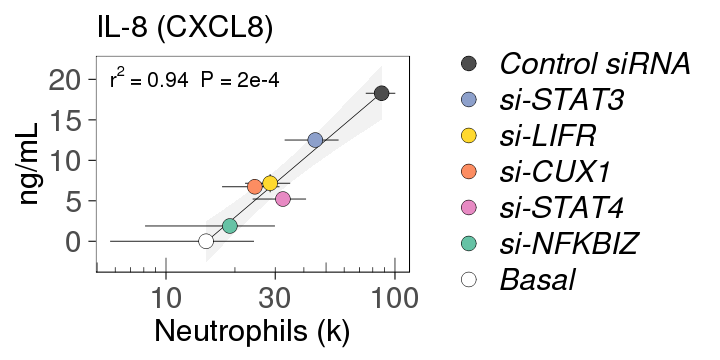

In [196]:
# migration_mean
# mig_elisa_mean
migration_mean$protein <- c("Monocyte" = "CCL2", "Neutrophil" = "IL-8 (CXCL8)")[migration_mean$cell_type]



d_p0 <- migration_mean %>%
filter(cell_type == "Neutrophil")
# mutate(sirna = factor(sirna, rev(levels(sirna))))

p0 <- ggplot(d_p0) +
aes(x = reorder(sirna, mean), ymin = low, ymax = high, y = mean, fill = sirna) +
geom_errorbar(width = 0, size = 0.25) +
geom_point(shape = 21, size = 4, stroke = 0.25) +
annotate(
  geom = "rect",
  ymin = -Inf, ymax = Inf,
  xmin = seq(0.5, 7, by = 2),
  xmax = seq(0.5, 7, by = 2) + 1,
  fill = "grey80",
  alpha = 0.25
) +
coord_flip() +
scale_fill_brewer(palette = "Set2", guide = FALSE) + 
scale_y_continuous(breaks = scales::pretty_breaks(n = 4)) +
scale_x_discrete(expand = c(0, 0)) +
theme(
  panel.grid.major = element_blank(),
  axis.ticks.y = element_blank(),
  axis.text = element_text(size = 18),
  axis.text.y = element_text(face = "italic", size = 18),
  axis.title = element_text(size = 18),
  plot.subtitle = element_text(size = 18)
) +
labs(
  y = "Cells (k)",
  x = NULL,
  subtitle = "Neutrophil migration"
)

d_p1 <- merge(migration_mean, mig_elisa_mean, by = c("sirna", "protein")) %>%
filter(cell_type == "Neutrophil") 

xx <- summary(lm(formula = log10(mean.x) ~ mean.y, data = d_p1))
p1r <- signif(xx$adj.r.squared, 2)
p1p <- str_replace_all(format.pval(xx$coefficients[2,4], digits = 1), "e-0", "e-")
p1lab <- bquote("r"^2~"="~.(p1r) ~ " P ="~.(p1p))
assay <- "Some Assay"

cor.test(log10(d_p1$mean.x), d_p1$mean.y)

p1 <- d_p1 %>%
ggplot() +
aes(
  y = mean.y,
  x = mean.x,
  fill = fct_reorder(sirna, mean.y, .desc = TRUE),
  ymin = low.y,
  ymax = high.y,
  xmin = low.x,
  xmax = high.x
) +
geom_smooth(method = "lm", aes(group = NA), size = 0.2, fill = "grey80", alpha = 0.25, color = "black") +
geom_errorbarh(size = 0.25, width = 0) +
geom_errorbar(size = 0.25, width = 0) +
geom_point(shape = 21, size = 4, stroke = 0.25) +
annotate(geom = "text", hjust = 0, vjust = 1.5, x = min(d_p1$low.x), y = Inf, label = deparse(p1lab), parse = TRUE, size = 4.5) +
# scale_fill_brewer(palette = "Set2", guide = guide_legend()) +
scale_fill_manual(values = qpcr_colors$sirna, guide = guide_legend(title = NULL)) +
scale_x_log10(breaks = scales::log_breaks(5)) +
annotation_logticks(sides = "b", size = 0.2) +
labs(y = "ng/mL", x = "Neutrophils (k)", subtitle = "IL-8 (CXCL8)") +
theme(
  legend.key.height = unit(1.5, "line"),
  legend.text = element_text(face = "italic", size = 18),
  panel.grid.major = element_blank(),
  axis.text = element_text(size = 18),
  axis.title = element_text(size = 18),
  plot.subtitle = element_text(size = 18)
)

options(repr.plot.width = 6, repr.plot.height = 3)

# show_plot(p0 + p1, name = "neutrophil-migration")

show_plot(p1, name = "neutrophil-migration")


	Pearson's product-moment correlation

data:  d_p1$mean.x and d_p1$mean.y
t = 9.6574, df = 5, p-value = 0.000202
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8303657 0.9963288
sample estimates:
      cor 
0.9742266 


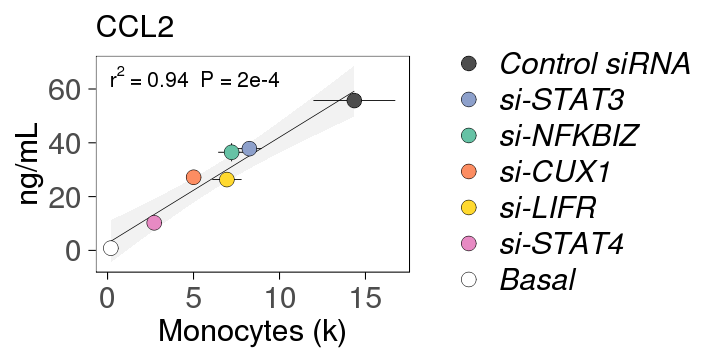

In [195]:
# migration_mean
# mig_elisa_mean
migration_mean$protein <- c("Monocyte" = "CCL2", "Neutrophil" = "IL-8 (CXCL8)")[migration_mean$cell_type]



d_p0 <- migration_mean %>%
filter(cell_type == "Monocyte")
# mutate(sirna = factor(sirna, rev(levels(sirna))))

p0 <- ggplot(d_p0) +
aes(x = reorder(sirna, mean), ymin = low, ymax = high, y = mean, fill = sirna) +
geom_errorbar(width = 0, size = 0.25) +
geom_point(shape = 21, size = 4, stroke = 0.25) +
annotate(
  geom = "rect",
  ymin = -Inf, ymax = Inf,
  xmin = seq(0.5, 7, by = 2),
  xmax = seq(0.5, 7, by = 2) + 1,
  fill = "grey80",
  alpha = 0.25
) +
coord_flip() +
scale_fill_brewer(palette = "Set2", guide = FALSE) + 
scale_y_continuous(breaks = scales::pretty_breaks(n = 4)) +
scale_x_discrete(expand = c(0, 0)) +
theme(
  panel.grid.major = element_blank(),
  axis.ticks.y = element_blank(),
  axis.text = element_text(size = 18),
  axis.text.y = element_text(face = "italic", size = 18),
  axis.title = element_text(size = 18),
  plot.subtitle = element_text(size = 18)
) +
labs(
  y = "Cells (k)",
  x = NULL,
  subtitle = "Monocyte migration"
)

d_p1 <- merge(migration_mean, mig_elisa_mean, by = c("sirna", "protein")) %>%
filter(cell_type == "Monocyte") 

xx <- summary(lm(formula = mean.x ~ mean.y, data = d_p1))
p1r <- signif(xx$adj.r.squared, 2)
p1p <- str_replace_all(format.pval(xx$coefficients[2,4], digits = 1), "e-0", "e-")
p1lab <- bquote("r"^2~"="~.(p1r) ~ " P ="~.(p1p))
assay <- "Some Assay"

cor.test(d_p1$mean.x, d_p1$mean.y)

p1 <- d_p1 %>%
ggplot() +
aes(
  y = mean.y,
  x = mean.x,
  fill = fct_reorder(sirna, mean.y, .desc = TRUE),
  ymin = low.y,
  ymax = high.y,
  xmin = low.x,
  xmax = high.x
) +
geom_smooth(method = "lm", aes(group = NA), size = 0.2, fill = "grey80", alpha = 0.25, color = "black") +
geom_errorbarh(size = 0.25, width = 0) +
geom_errorbar(size = 0.25, width = 0) +
geom_point(shape = 21, size = 4, stroke = 0.25) +
annotate(geom = "text", hjust = 0, vjust = 1.5, x = min(d_p1$low.x), y = Inf, label = deparse(p1lab), parse = TRUE, size = 4.5) +
# scale_fill_brewer(palette = "Set2", guide = guide_legend()) +
scale_fill_manual(values = qpcr_colors$sirna, guide = guide_legend(title = NULL)) +
# scale_x_log10(breaks = scales::log_breaks(5)) +
# annotation_logticks(sides = "b", size = 0.2) +
labs(y = "ng/mL", x = "Monocytes (k)", subtitle = "CCL2") +
theme(
  legend.key.height = unit(1.5, "line"),
  legend.text = element_text(face = "italic", size = 18),
  panel.grid.major = element_blank(),
  axis.text = element_text(size = 18),
  axis.title = element_text(size = 18),
  plot.subtitle = element_text(size = 18)
)

options(repr.plot.width = 6, repr.plot.height = 3)

# show_plot(p0 + p1, name = "neutrophil-migration")

show_plot(p1, name = "monocyte-migration")

In [179]:
d_p1

sirna,protein,cell_type,low.x,mean.x,high.x,low.y,mean.y,high.y
Basal,CCL2,Monocyte,0.1460475,0.1909117,0.2574175,0.8154545,0.8395455,0.8636364
Control siRNA,CCL2,Monocyte,11.7661300,14.3513858,18.1595750,55.3363636,55.6909091,56.0454546
si-CUX1,CCL2,Monocyte,4.8076925,5.0053808,5.2459025,24.9363636,27.1909091,29.4454545
si-LIFR,CCL2,Monocyte,5.5566400,6.9408892,7.7771375,25.5727273,26.3272727,27.0818182
si-NFKBIZ,CCL2,Monocyte,5.9481050,7.2155600,7.9817075,33.1000000,36.4727273,39.8454545
si-STAT3,CCL2,Monocyte,7.5415675,8.2486992,9.3927650,35.6000000,37.8181818,40.0363636
si-STAT4,CCL2,Monocyte,2.3960075,2.7142550,3.0721400,7.9000000,10.2545455,12.6090909


In [84]:
d_p1 %>%
mutate(reduction = 1 - (mean.y / 18.287500))

sirna,protein,cell_type,low.x,mean.x,high.x,low.y,mean.y,high.y,reduction
Basal,IL-8 (CXCL8),Neutrophil,8.413706,14.96395,21.51420,0.004166667,0.004300,0.004433333,0.9997649
Control siRNA,IL-8 (CXCL8),Neutrophil,78.333333,87.43794,96.54255,18.098333330,18.287500,18.476666670,0.0000000
si-CUX1,IL-8 (CXCL8),Neutrophil,19.580000,24.43286,29.28571,6.111666667,6.732500,7.353333333,0.6318524
si-LIFR,IL-8 (CXCL8),Neutrophil,24.001479,28.49876,32.99603,6.056666667,7.171667,8.286666667,0.6078378
si-NFKBIZ,IL-8 (CXCL8),Neutrophil,11.293513,19.00715,26.72078,1.865000000,1.889167,1.913333333,0.8966963
si-STAT3,IL-8 (CXCL8),Neutrophil,36.461040,44.86027,53.25949,11.938333330,12.506667,13.075000000,0.3161085
si-STAT4,IL-8 (CXCL8),Neutrophil,26.392508,32.40497,38.41743,5.038333333,5.217500,5.396666667,0.7146958


asdf

In [198]:
# 2018-08-16 IL-8 ELISA - NFKBIZ siRNA.xlsx
d1 <- readr::read_tsv("sirna	tnf	tnf_il17
Ctrl,siRNA	462.1176471	11723.82353
Ctrl,siRNA	478.2352941	14431.76471
NFKBIZ,#1	410.7058824	2287.941176
NFKBIZ,#1	374.2352941	2477.647059
NFKBIZ,#2	803.5294118	2959.411765
NFKBIZ,#2	823.1764706	2314.411765
NFKBIZ,#3	581.1764706	2071.764706
NFKBIZ,#3	653.0588235	1738.235294
") %>%
mutate(protein = "CXCL8", basal = 0)

# 2018-08-16 IL-6 ELISA - NFKBIZ siRNA.xlsx
# 2018-08-16 MMP3 ELISA - NFKBIZ siRNA.xlsx
d2 <- readr::read_tsv("protein	sirna	basal	tnf	tnf_il17
IL6	Ctrl,siRNA	16	243.6666667	8547.5
IL6	Ctrl,siRNA	22.55555556	261.7777778	10132.5
IL6	NFKBIZ,#1	19.55555556	219.1111111	1248.333333
IL6	NFKBIZ,#1	23.61111111	228.6666667	1415
IL6	NFKBIZ,#2	34.05555556	462.7777778	3025
IL6	NFKBIZ,#2	35.66666667	524.6666667	2680
IL6	NFKBIZ,#3	33.05555556	498.1111111	2592.5
IL6	NFKBIZ,#3	36.72222222	545.5555556	2280.833333
MMP3	Ctrl,siRNA	12.29411765	33.76470588	743.8235294
MMP3	Ctrl,siRNA	16.91176471	25.70588235	711.6176471
MMP3	NFKBIZ,#1	17.02941176	22.82352941	36.91176471
MMP3	NFKBIZ,#1	13.82352941	19.47058824	42.64705882
MMP3	NFKBIZ,#2	14.82352941	35.58823529	46.17647059
MMP3	NFKBIZ,#2	17.64705882	37.17647059	45.29411765
MMP3	NFKBIZ,#3	11.55882353	33.76470588	34.41176471
MMP3	NFKBIZ,#3	14.97058824	33.35294118	47.94117647
")

d_elisa <- bind_rows(d1, d2)

d <- d_elisa %>%
mutate(
  sirna = str_split_fixed(sirna, "[ ,]", 2)[,1]
)

d_mean <- d %>%
  group_by(sirna, protein) %>%
  summarise(
    basal = mean(basal),
    tnf = mean(tnf),
    tnf_il17 = mean(tnf_il17)
  )

d_mean %>%
  group_by(protein) %>%
  summarise(reduction = 1 - tnf_il17[sirna == "NFKBIZ"] / tnf_il17[sirna == "Ctrl"])


protein,reduction
CXCL8,0.8234996
IL6,0.7637104
MMP3,0.9419689


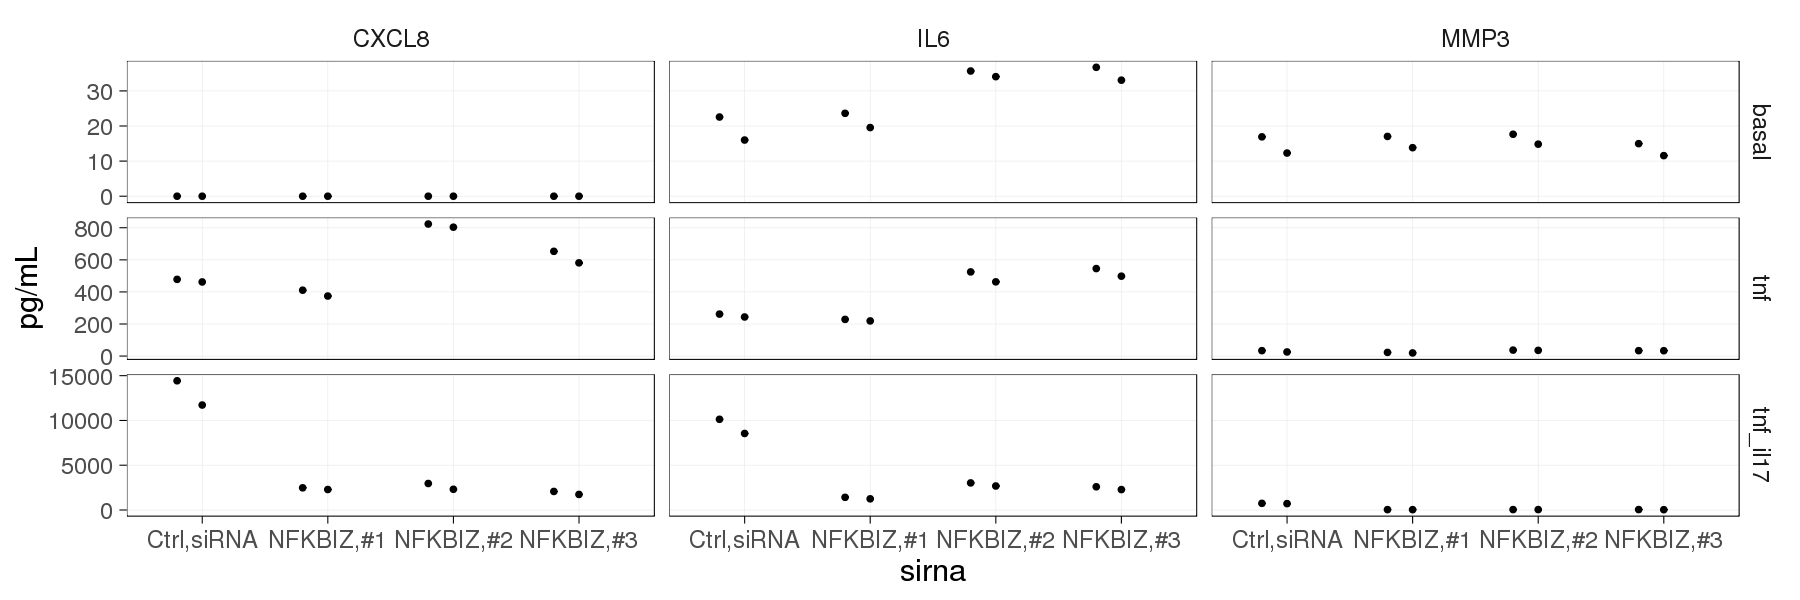

In [200]:
options(repr.plot.width = 15, repr.plot.height = 5)

p <- {
  d_elisa %>% gather("stim", "value", -c(sirna, protein)) %>%
  mutate(value = as.numeric(value)) %>%
  ggplot() +
  ggbeeswarm::geom_quasirandom(aes(x = sirna, y = value), groupOnX = TRUE) +
  facet_grid(stim ~ protein, scales = "free_y") +
  labs(y = "pg/mL")
}
show_plot(p)

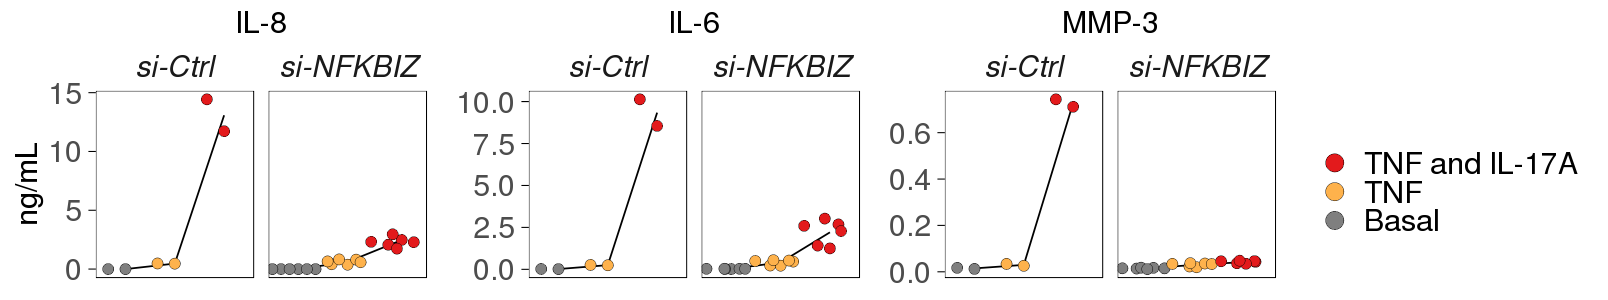

In [259]:

d1 <- d %>% gather("stim", "value", -c(sirna, protein)) %>%
mutate(value = as.numeric(value))

d2 <- d1 %>% group_by(sirna, stim, protein) %>%
summarise(value = mean(value))

plot_protein <- function(this_protein = "CXCL8") {
  p <- ggplot() +
  geom_line(
    data = d2 %>% filter(protein == this_protein) %>% mutate(sirna2 = sprintf("si-%s", sirna)),
    mapping = aes(x = stim, y = (value / 1e3), group = paste(protein, sirna))
  ) +
  ggbeeswarm::geom_quasirandom(
    data = d1 %>% filter(protein == this_protein) %>% mutate(sirna2 = sprintf("si-%s", sirna)),
    mapping = aes(x = stim, y = (value / 1e3), fill = stim),
    shape = 21, size = 3, stroke = 0.2, width = 0.7
  ) +
  scale_x_discrete(labels = c("Basal", "TNF", "TNF and IL-17A")) +
  facet_grid(~ sirna2) +
  # facet_wrap(~ protein, scales = "free_y") +
  # scale_color_manual(values = c("grey30", "red")) +
  scale_fill_manual(
    guide = guide_legend(override.aes = aes(size = 5), title = NULL, reverse = TRUE),
    values = c(
      "basal" = "grey50",
      "tnf" = "#FEB24C",
      "tnf_il17" = "#E31A1C"
    ),
    labels = c(
      "basal"    = "Basal",
      "tnf"      = "TNF",
      "tnf_il17" = "TNF and IL-17A"
    )
  ) +
#   geom_text(
#     data = data.frame(sirna2 = "si-NFKBIZ", x = "tnf_il17", y = 7, label = "↓ 82%"),
#     mapping = aes(x, y, label = label),
#     size = 6
#   ) +
  theme(
    legend.text = element_text(size = 18),
    plot.title = element_text(size = 18),
    axis.title = element_text(size = 18),
    axis.text = element_text(size = 18),
    panel.grid.major = element_blank(),
    legend.position = "none",
    strip.text = element_text(face = "italic", size = 18),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  ) +
  labs(x = NULL, y = "ng/mL", title = this_protein)
}

p1 <- plot_protein("CXCL8") + labs(title = "IL-8")
p2 <- plot_protein("IL6") + labs(y = NULL, title = "IL-6")
p3 <- plot_protein("MMP3") + labs(y = NULL, title = "MMP-3") + theme(legend.position = "right")

options(repr.plot.width = 0.8 + 4.2 * 3, repr.plot.height = 2.5)

show_plot(name = "protein-si-nfkbiz", p1 + p2 + p3 + plot_layout(ncol = 3))

In [255]:
d1 %>% filter(protein == "IL6")

sirna,protein,stim,value
Ctrl,IL6,tnf,243.66667
Ctrl,IL6,tnf,261.77778
NFKBIZ,IL6,tnf,219.11111
NFKBIZ,IL6,tnf,228.66667
NFKBIZ,IL6,tnf,462.77778
NFKBIZ,IL6,tnf,524.66667
NFKBIZ,IL6,tnf,498.11111
NFKBIZ,IL6,tnf,545.55556
Ctrl,IL6,tnf_il17,8547.50000
Ctrl,IL6,tnf_il17,10132.50000


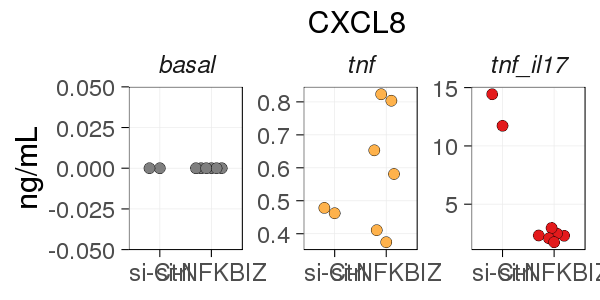

In [219]:
options(repr.plot.width = 5, repr.plot.height = 2.5)

d1 <- d %>% gather("stim", "value", -c(sirna, protein)) %>%
mutate(value = as.numeric(value))

d2 <- d1 %>% group_by(sirna, stim, protein) %>%
summarise(value = mean(value))

p <- ggplot() +
# geom_line(
#   data = d2 %>% filter(protein == "CXCL8") %>% mutate(sirna2 = sprintf("si-%s", sirna)),
#   mapping = aes(x = sirna2, y = value / 1e3, group = sirna))
# ) +
ggbeeswarm::geom_quasirandom(
  groupOnX = TRUE,
  data = d1 %>% filter(protein == "CXCL8") %>% mutate(sirna2 = sprintf("si-%s", sirna)),
  mapping = aes(x = sirna2, y = value / 1e3, fill = stim, group = paste(sirna, sirna2)),
  shape = 21, size = 3, stroke = 0.2
) +
# scale_x_discrete(labels = c("Basal", "TNF", "TNF and IL-17A")) +
facet_wrap(~ stim, scales = "free_y") +
# facet_wrap(~ protein, scales = "free_y") +
# scale_color_manual(values = c("grey30", "red")) +
scale_fill_manual(values = c(
  "basal" = "grey50",
  "tnf" = "#FEB24C",
  "tnf_il17" = "#E31A1C"
)) +
# geom_text(
#   data = data.frame(sirna2 = "si-NFKBIZ", x = "tnf_il17", y = 7, label = "↓ 82%"),
#   mapping = aes(x, y, label = label),
#   size = 5
# ) +
theme(legend.position = "none", strip.text = element_text(face = "italic")) +
labs(x = NULL, y = "ng/mL", title = "CXCL8")

show_plot(p)

In [205]:
mat <- d_elisa %>%
gather("stim", "value", -sirna, -protein) %>%
tidyr::unite("sirna_stim", sirna, stim, sep = "-") %>%
mutate(value = as.numeric(value), sirna_stim = sprintf("%s-%s", sirna_stim, 1:2)) %>%
spread(sirna_stim, value)
mat <- as.data.frame(mat)
rownames(mat) <- mat$protein
mat$protein <- NULL
mat <- log2(mat + 1)
#mat

meta <- as.data.frame(str_split_fixed(colnames(mat), "-", 3))
colnames(meta) <- c("sirna", "stim", "rep")
meta$sirna <- str_split_fixed(meta$sirna, ",", 2)[,1]
#meta

clean_cols <- function(x) {
  colnames(x) <- str_replace_all(colnames(x), "[()]", "")
  colnames(x) <- str_replace_all(colnames(x), ":", "")
  colnames(x) <- str_replace_all(colnames(x), "sirna", "")
  colnames(x) <- str_replace_all(colnames(x), " siRNA", "")
  colnames(x) <- str_replace_all(colnames(x), "si-", "")
  colnames(x) <- str_replace_all(colnames(x), "cell_line", "")
  return(x)
}

des <- clean_cols(with(
  meta,
  model.matrix(~ 0 + sirna:stim)
))

print(colnames(des))

fit <- lmFit(object = mat, design = des)
fit <- eBayes(fit)

con <- contrasts.fit(
  fit = fit,
  contrasts = makeContrasts(
    contrasts = c(
      "NFKBIZstimtnf_il17 - Ctrlstimtnf_il17",
      "NFKBIZstimtnf - Ctrlstimtnf"
    ),
    levels = des
  )
)
con <- eBayes(con)



# top <- do.call(rbind, lapply(1:7, function(i) {
#   retval <- topTable(con, coef = i, confint = TRUE, n = 7)
#   retval$stim <- c("Basal", "STAT4", "STAT3", "NFKBIZ_1", "NFKBIZ_3", "LIFR", "CUX1")[i]
#   retval
# }))
# top

[1] "Ctrlstimbasal"      "NFKBIZstimbasal"    "Ctrlstimtnf"       
[4] "NFKBIZstimtnf"      "Ctrlstimtnf_il17"   "NFKBIZstimtnf_il17"


protein,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,B,stim
MMP3,-4.084824199,-4.5584820,-3.6111664,5.117949,-17.72432297,4.580454e-16,1.374136e-15,26.773562,tnf_il17
CXCL8,-2.512833483,-3.0165426,-2.0091243,6.963946,-10.25285493,1.216758e-10,1.825137e-10,14.317760,tnf_il17
IL6,-2.150323184,-2.8770689,-1.4235775,8.266881,-6.08110070,1.973500e-06,1.973500e-06,4.546768,tnf_il17
IL6,0.610183676,-0.1165620,1.3369294,8.266881,1.72559567,9.625319e-02,2.887596e-01,-4.187880,tnf
CXCL8,0.305841046,-0.1978681,0.8095502,6.963946,1.24789163,2.231602e-01,3.347403e-01,-4.606391,tnf
MMP3,0.003952915,-0.4697048,0.4776107,5.117949,0.01715196,9.864459e-01,9.864459e-01,-5.100545,tnf


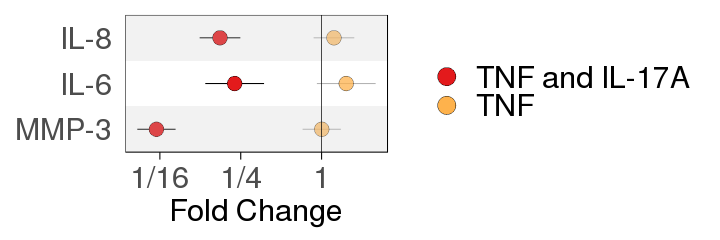

In [285]:
x <- bind_rows(
  topTable(con, coef = 1, confint = TRUE) %>%
  tibble::rownames_to_column("protein") %>%
  mutate(stim = "tnf_il17"),
  topTable(con, coef = 2, confint = TRUE) %>%
  tibble::rownames_to_column("protein") %>%
  mutate(stim = "tnf")
)
x

p2 <- ggplot(x, aes(x = fct_relevel(protein, "MMP3", "IL6", "CXCL8"))) +
geom_errorbar(
  mapping = aes(ymin = CI.L, ymax = CI.R, color = adj.P.Val < 0.05),
  width = 0, size = 0.3
) +
geom_point(
  aes(y = logFC, fill = stim, alpha = adj.P.Val < 0.05), shape = 21, stroke = 0.2, size = 4
) +
annotate(
  geom = "rect",
  ymin = -Inf, ymax = Inf,
  xmin = seq(0.5, 3 - 0.5, by = 2),
  xmax = seq(0.5, 3 - 0.5, by = 2) + 1,
  fill = "grey80",
  alpha = 0.25
) +
scale_color_manual(values = c("grey70", "black"), guide = FALSE) +
scale_alpha_manual(values = c(0.75, 1), guide = FALSE) +
geom_hline(yintercept = 0, size = 0.2) +
scale_fill_manual(
  guide = guide_legend(title = NULL, override.aes = aes(size = 5), reverse = TRUE),
  values = unname(qpcr_colors$stimulation[2:3]),
  labels = c("tnf" = "TNF", "tnf_il17" = "TNF and IL-17A")
) +
scale_y_continuous(labels = function(x) fractional(2 ^ x)) +
scale_x_discrete(expand = c(0, 0), labels = c("CXCL8" = "IL-8", "IL6" = "IL-6", "MMP3" = "MMP-3")) +
theme(
  legend.text = element_text(size = 18),
  plot.title = element_text(size = 18),
  axis.title = element_text(size = 18),
  axis.text = element_text(size = 18),
  panel.grid.major = element_blank(),
  strip.text = element_text(face = "italic", size = 18),
  axis.ticks.y = element_blank()
) +
coord_flip() +
labs(
  x = NULL, y = "Fold Change"
)

options(repr.plot.width = 6, repr.plot.height = 2)

show_plot(name = "protein-si-nfkbiz-foldchange", p2)

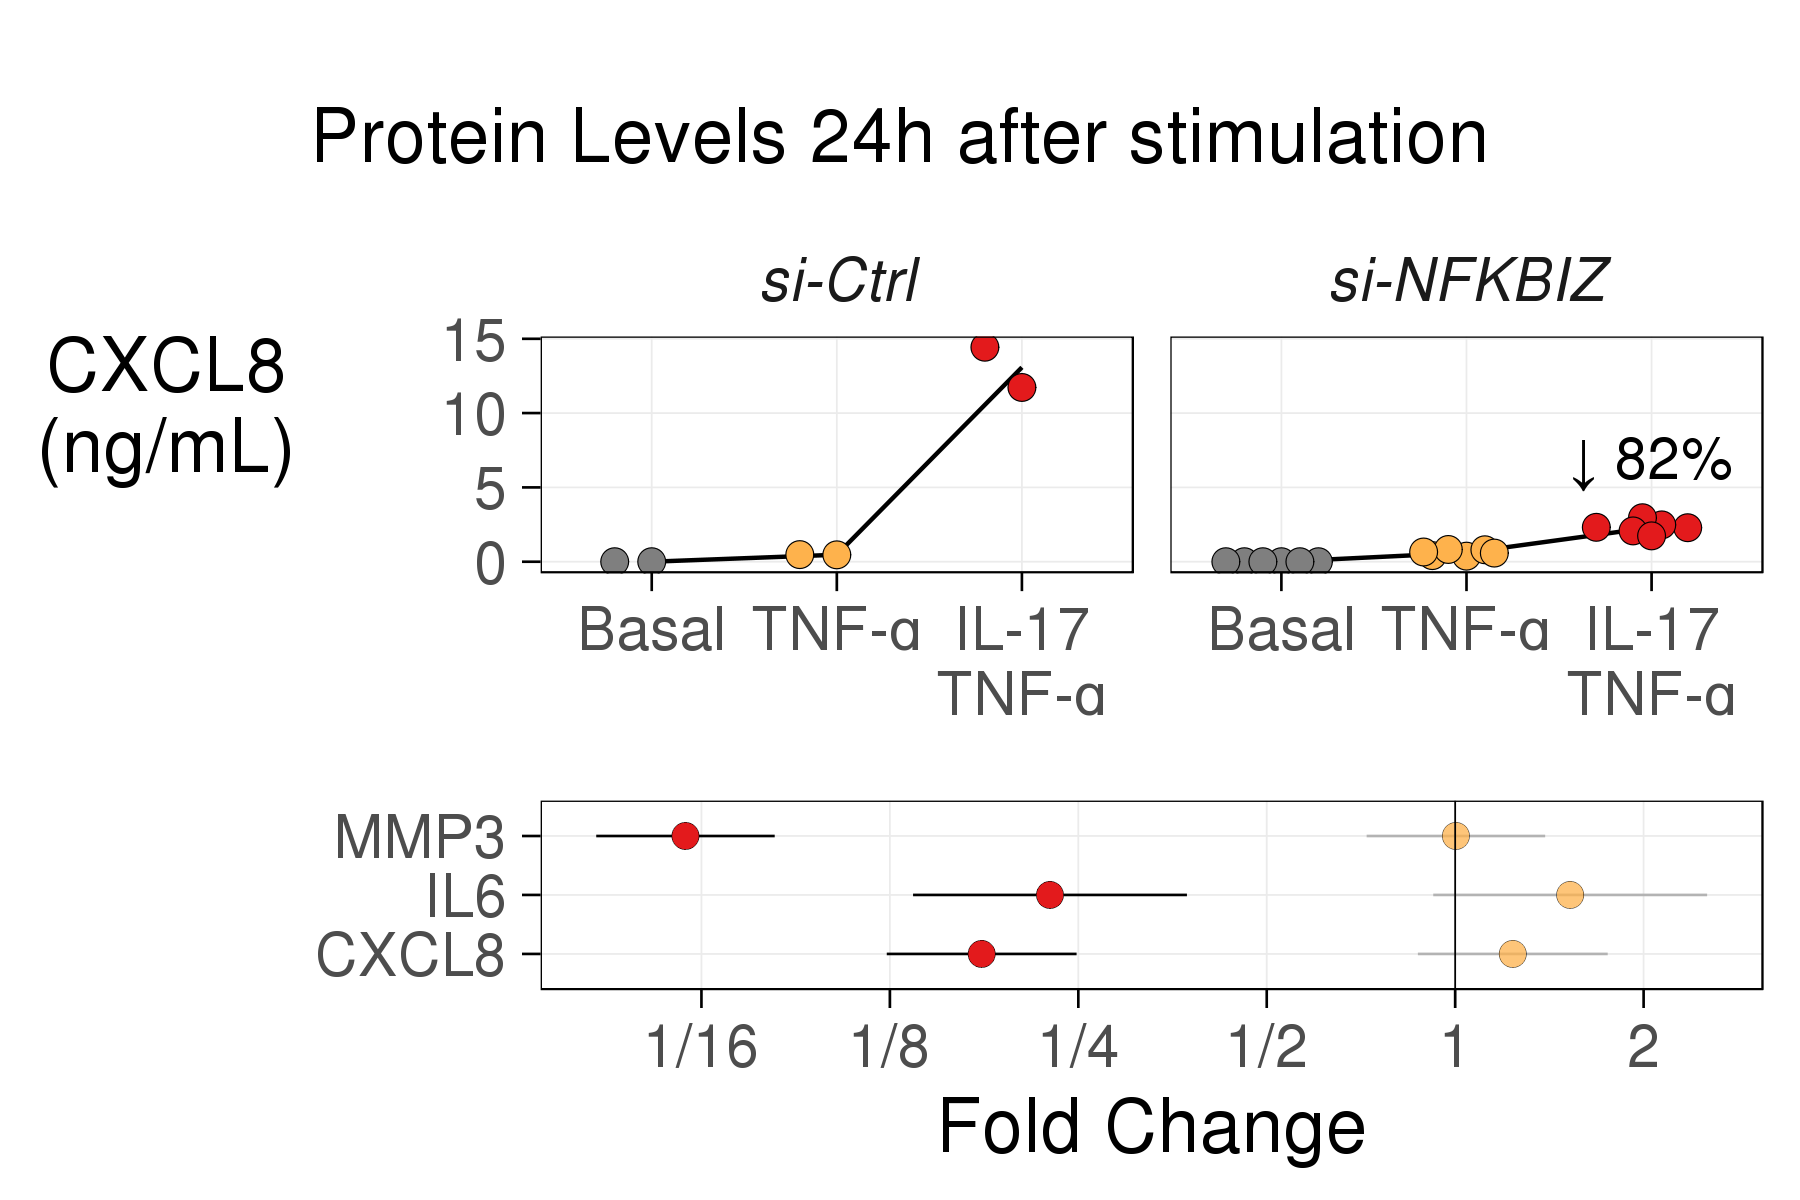

In [408]:
options(repr.plot.width = 6, repr.plot.height = 4)

show_plot(res = 300,
  (
    (
      p + labs(y = "CXCL8\n(ng/mL)", title = NULL) +
      theme(axis.title.y = element_text(angle = 0))
    ) /
    (
      p2 + labs(subtitle = NULL) + theme(legend.position = "none")
    )
  ) + plot_annotation(title = "\nProtein Levels 24h after stimulation") +
  plot_layout(ncol = 1, heights = c(5, 4))
)

In [272]:
qpcr_colors$stimulation

None                TNF (0.1ng/mL) 
                     "grey50"                     "#FEB24C" 
TNF (0.1ng/mL)+IL-17 (1ng/mL) 
                    "#E31A1C"

In [203]:
stocks <- data.frame(
  time = as.Date('2009-01-01') + 0:9,
  X = rnorm(10, 0, 1),
  Y = rnorm(10, 0, 2),
  Z = rnorm(10, 0, 4)
)
stocksm <- stocks %>% gather(stock, price, -time)
stocksm
stocksm %>% spread(stock, price)

time,stock,price
2009-01-01,X,0.60915575
2009-01-02,X,-0.19907707
2009-01-03,X,1.55721378
2009-01-04,X,0.81945724
2009-01-05,X,-1.87951203
2009-01-06,X,-0.72167926
2009-01-07,X,-1.83962555
2009-01-08,X,0.42831579
2009-01-09,X,-0.82743815
2009-01-10,X,0.29942866


time,X,Y,Z
2009-01-01,0.6091557,-1.59013597,4.16346815
2009-01-02,-0.1990771,0.63419798,2.92919648
2009-01-03,1.5572138,-0.23868644,-2.49965304
2009-01-04,0.8194572,-1.62774977,3.57724417
2009-01-05,-1.8795120,-4.86167112,-4.71913401
2009-01-06,-0.7216793,0.33790284,-1.50209076
2009-01-07,-1.8396255,3.37124973,-0.02775122
2009-01-08,0.4283158,-0.12816266,0.01266575
2009-01-09,-0.8274382,-0.06941387,4.52867616
2009-01-10,0.2994287,-1.90958697,8.12477396


In [69]:
head(migration_mean)

sirna,cell_type,low,mean,high,protein
si-STAT4,Monocyte,2.396008,2.714255,3.072140,CCL2
si-STAT4,Neutrophil,26.392508,32.404969,38.417431,IL-8 (CXCL8)
si-STAT3,Monocyte,7.541568,8.248699,9.392765,CCL2
si-STAT3,Neutrophil,36.461040,44.860267,53.259494,IL-8 (CXCL8)
si-NFKBIZ,Monocyte,5.948105,7.215560,7.981708,CCL2
si-NFKBIZ,Neutrophil,11.293513,19.007146,26.720779,IL-8 (CXCL8)


In [ ]:
p <- ggplot(migration_mean) +
aes(x = sirna, ymin = low, ymax = high, y = mean) +
geom_errorbar(width = 0, size = 0.5) +
# geom_line(aes(group = paste(date, replicate))) +
geom_point() +
geom_hline(
  data = migration_mean %>% filter(sirna == "Control siRNA"),
  mapping = aes(yintercept = mean),
  size = 0.1
) +
annotate(
  geom = "rect",
  ymin = -Inf, ymax = Inf,
  xmin = seq(0.5, 7, by = 2),
  xmax = seq(0.5, 7, by = 2) + 1,
  alpha = 0.05
) +
coord_flip() +
scale_y_continuous(breaks = scales::pretty_breaks(n = 3)) +
facet_grid(~ cell_type, scales = "free_x") +
theme(axis.text.y = element_text(face = "italic"), panel.grid.major = element_blank()) +
labs(
  y = "Cells (k)",
  x = NULL,
  subtitle = "Migration"
)

show_plot(p, res = 300)


p <- ggplot(mig_elisa_mean) +
aes(x = sirna, ymin = low, ymax = high, y = mean) +
geom_errorbar(width = 0, size = 0.5) +
# geom_line(aes(group = paste(date, replicate))) +
geom_point() +
geom_hline(
  data = mig_elisa_mean %>% filter(sirna == "Control siRNA"),
  mapping = aes(yintercept = mean),
  size = 0.1
) +
annotate(
  geom = "rect",
  ymin = -Inf, ymax = Inf,
  xmin = seq(0.5, 7, by = 2),
  xmax = seq(0.5, 7, by = 2) + 1,
  alpha = 0.05
) +
coord_flip() +
scale_y_continuous(breaks = scales::pretty_breaks(n = 3)) +
facet_grid(~ protein, scales = "free_x") +
theme(
  axis.text.y = element_text(face = "italic"),
  panel.grid.major = element_blank()
) +
labs(
  y = "Protein (ng/mL)",
  x = NULL,
  subtitle = "ELISA"
)

show_plot(p, res = 300)

In [70]:
x <- migration %>%
select(date, cell_type, replicate, sirna, cells_per_bead) %>%
spread(key = "sirna", value = "cells_per_bead") %>%
filter(cell_type == "Neutrophil")

do.call(rbind, lapply(c("si-STAT4", "si-STAT3", "si-NFKBIZ", "si-LIFR", "si-CUX1"), function(this_sirna) {
  retval <- broom::tidy(t.test(x[[this_sirna]], x[["Control siRNA"]]))
  retval$sirna <- this_sirna
  retval
}))

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative,sirna
-22.01319,12.961988,34.97518,-5.043940,0.04936961,1.732824,-43.85784,-0.1685390,Welch Two Sample t-test,two.sided,si-STAT4
-17.03107,17.944107,34.97518,-3.437252,0.07590213,1.987133,-38.48290,4.4207618,Welch Two Sample t-test,two.sided,si-STAT3
-27.37232,7.602858,34.97518,-5.734634,0.03089777,1.947437,-48.45002,-6.2946200,Welch Two Sample t-test,two.sided,si-NFKBIZ
-23.57567,11.399502,34.97518,-5.804087,0.05553607,1.460566,-48.96064,1.8092939,Welch Two Sample t-test,two.sided,si-LIFR
-25.20203,9.773143,34.97518,-6.106815,0.04723170,1.525765,-49.45322,-0.9508506,Welch Two Sample t-test,two.sided,si-CUX1


In [71]:
x <- migration %>%
select(date, cell_type, replicate, sirna, cells_per_bead) %>%
spread(key = "sirna", value = "cells_per_bead") %>%
filter(cell_type == "Monocyte")

do.call(rbind, lapply(c("si-STAT4", "si-STAT3", "si-NFKBIZ", "si-LIFR", "si-CUX1"), function(this_sirna) {
  retval <- broom::tidy(t.test(x[[this_sirna]], x[["Control siRNA"]]))
  retval$sirna <- this_sirna
  retval
}))

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative,sirna
-4.654852,1.085702,5.740554,-5.955068,0.02580134,2.040722,-7.954572,-1.3551325,Welch Two Sample t-test,two.sided,si-STAT4
-2.441075,3.299480,5.740554,-3.008937,0.07792649,2.349962,-5.477964,0.5958144,Welch Two Sample t-test,two.sided,si-STAT3
-2.854330,2.886224,5.740554,-3.487040,0.05520634,2.426192,-5.845059,0.1363980,Welch Two Sample t-test,two.sided,si-NFKBIZ
-2.964199,2.776356,5.740554,-3.587789,0.04942082,2.505852,-5.912617,-0.0157799,Welch Two Sample t-test,two.sided,si-LIFR
-3.738402,2.002152,5.740554,-4.796484,0.04013327,2.017418,-7.064316,-0.4124876,Welch Two Sample t-test,two.sided,si-CUX1


# Neutrophil Migration 2

In [75]:
mig <- readr::read_tsv("sirna	Expt 091118	Expt 101918	Expt 103018
Control siRNA	27.08704883	9.42639068	6.432191296
CUX1	12.7579693	3.629647271	2.508196493
LIFR	10.97013026	4.180681281	3.021565017
STAT3	17.98523207	4.501108831	4.051379653
STAT4	12.3102468	3.842821782	2.648013409
NFKBIZ,1	11.90528703	4.870904161	3.085154005
NFKBIZ,3	9.836602974	5.606496711	3.158785638
Basal	6.614476198	3.203549604	1.830184403
Basal, Stdev	2.815984925	0.429592075	1.14561512")

mig <- mig %>%
gather(key = "experiment", value = "value", -sirna) %>%
filter(sirna != "Basal, Stdev")

ix <- !mig$sirna %in% c("NFKBIZ,1")
mig <- mig[ix,]

ix <- !mig$sirna %in% c("Basal", "Control siRNA")
mig$sirna[ix] <- sprintf("si-%s", mig$sirna[ix])
    
mig$sirna <- str_split_fixed(mig$sirna, ",", 2)[,1]

mig$sirna <- factor(
  mig$sirna,
  levels = c(
    "si-STAT4",
    "si-STAT3",
    "si-NFKBIZ",
    "si-LIFR",
    "si-CUX1",
    "Control siRNA",
    "Basal"
  )
)

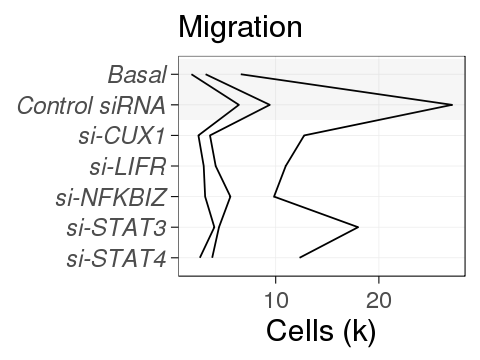

In [76]:
options(repr.plot.width = 4, repr.plot.height = 3)

p <- ggplot(mig) +
aes(x = sirna, y = value) +
coord_flip() +
# geom_point() +
geom_line(aes(group = experiment)) +
annotate(
  geom = "rect",
  ymin = -Inf, ymax = Inf, xmin = 5.5, xmax = 7.5,
  alpha = 0.05
) +
# scale_x_continuous(breaks = scales::pretty_breaks(n = 3)) +
# facet_grid(~ cell_type, scales = "free_x") +
theme(axis.text.y = element_text(face = "italic")) +
labs(
  y = "Cells (k)",
  x = NULL,
  subtitle = "Migration"
)

show_plot(p)

In [77]:
mig2 <- readr::read_tsv("sirna	Expt 091118	Expt 101918	Expt 103018
Control	27.08704883	9.42639068	6.432191296
CUX1	12.7579693	3.629647271	2.508196493
LIFR	10.97013026	4.180681281	3.021565017
STAT3	17.98523207	4.501108831	4.051379653
STAT4	12.3102468	3.842821782	2.648013409
NFKBIZ,1	11.90528703	4.870904161	3.085154005
NFKBIZ,3	9.836602974	5.606496711	3.158785638
Basal	6.614476198	3.203549604	1.830184403
Basal, Stdev	2.815984925	0.429592075	1.14561512") %>%
gather(key = "experiment", value = "value", -sirna) %>%
filter(sirna != "Basal, Stdev")

mig2$experiment <- str_split_fixed(mig2$experiment, " ", 2)[,2]
mig2$colname <- sprintf("%s_%s", mig2$sirna, mig2$experiment)
mig2$sirna <- str_replace(mig2$sirna, ",", "_")